# Market Sales Forecasting

## 1. Read the data from MySQL and convert data
### 1.1. Import important packages

In [1]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import pyaf.HierarchicalForecastEngine as hautof
import pymysql
import os
import datetime
import decimal
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

### 1.2. Connect to MySQL database reconai

In [2]:
mydb = pymysql.connect(host='localhost',
                             user='root',
                             password='peacebro',database='reconai')
print(mydb)
sql_actualData='SELECT * from `MarketActual`;'

### 1.3. Rearrange elements as columns
#### 1.3.1. Add date column and remove commas from Sales

In [3]:
df_read=pd.read_sql(sql_actualData, mydb)
def sales_product(df):
    df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['Year', 'month', 'day']])+pd.to_timedelta(df.Week*7, unit='days')
    df['Sales'] = df['Sales'].str.replace(',', '')
    df['Sales'] = df['Sales'].astype(float)   
sales_product(df_read)

In [4]:
col="XYZ_SM_N XYZ_SM_E XYZ_SM_GC XYZ_SM_DS XYZ_SM_W AAA_SM_E AAA_SM_GC AAA_SM_DS AAA_SM_W XYZ_BC_N XYZ_BC_E XYZ_BC_S XYZ_BC_W AAA_BC_N AAA_BC_E AAA_BC_S AAA_BC_W XYZ_RX_N XYZ_RX_E XYZ_RX_S XYZ_RX_W AAA_RX_N AAA_RX_E AAA_RX_S AAA_RX_W".split()
df_edit=pd.DataFrame(df_read,columns=['date'])
df_edit.drop_duplicates(subset ="date", 
                     keep = "first", inplace = True)
df_edit.index = pd.RangeIndex(len(df_edit.index))

df_edit.index = range(len(df_edit.index))

#### 1.3.2. Setting separate columns for each amount

In [5]:
i=0
def set_columns(newdf,i):
    newdf.index = pd.RangeIndex(len(newdf.index))
    newdf.index = range(len(newdf.index))
    df_edit[col[i]]=newdf['Sales']
    return i+1
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='North')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='East')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='Gulf Coast')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='Deep South')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='West')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='East')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='Gulf Coast')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='Deep South')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='SuperMart')&(df_read['Retailer Region']=='West')]
i=set_columns(newdf,i)

newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='BigCo')&(df_read['Retailer Region']=='North')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='BigCo')&(df_read['Retailer Region']=='East')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='BigCo')&(df_read['Retailer Region']=='South')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='BigCo')&(df_read['Retailer Region']=='West')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='BigCo')&(df_read['Retailer Region']=='North')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='BigCo')&(df_read['Retailer Region']=='East')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='BigCo')&(df_read['Retailer Region']=='South')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='BigCo')&(df_read['Retailer Region']=='West')]
i=set_columns(newdf,i)

newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='Rx')&(df_read['Retailer Region']=='North')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='Rx')&(df_read['Retailer Region']=='East')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='Rx')&(df_read['Retailer Region']=='South')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='XYZ Manufacturing') & (df_read['Retailer']=='Rx')&(df_read['Retailer Region']=='West')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='Rx')&(df_read['Retailer Region']=='North')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='Rx')&(df_read['Retailer Region']=='East')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='Rx')&(df_read['Retailer Region']=='South')]
i=set_columns(newdf,i)
newdf = df_read[(df_read['CPG']=='AAA Industries') & (df_read['Retailer']=='Rx')&(df_read['Retailer Region']=='West')]
i=set_columns(newdf,i)

#### 1.3.3. Display the new DataFrame

In [6]:
df_edit.head()

date    XYZ_SM_N    XYZ_SM_E  XYZ_SM_GC  XYZ_SM_DS    XYZ_SM_W  \
0 2017-01-08  1000000.00  3000000.00  750000.00  600000.00  4250000.00   
1 2017-01-15   999200.00  2970600.00  756975.00  615780.00  4447625.00   
2 2017-01-22   963828.32  2844646.56  720261.71  594412.43  4604626.16   
3 2017-01-29   972406.39  2960708.14  753969.96  598692.20  4556738.05   
4 2017-02-05   995646.90  2999789.49  719815.12  600248.80  4561750.46   

     AAA_SM_E   AAA_SM_GC  AAA_SM_DS    AAA_SM_W    ...        AAA_BC_S  \
0  1500000.00  2700000.00  870000.00  2900000.00    ...      1500000.00   
1  1439550.00  2779920.00  849207.00  2795890.00    ...      1480350.00   
2  1394348.13  2849973.98  819569.68  2710615.36    ...      1415658.71   
3  1387236.95  2933763.22  829076.68  2818497.85    ...      1384089.52   
4  1410403.81  2822280.22  816474.72  2710831.23    ...      1382290.20   

     AAA_BC_W   XYZ_RX_N   XYZ_RX_E   XYZ_RX_S   XYZ_RX_W   AAA_RX_N  \
0  3580000.00  760000.00  842000.00  951000.00  170000.00  398000.00   
1  3721052.00  756808.00  870543.80  913530.60  172278.00  407392.80   
2  3694260.43  768992.61  827103.66  872421.72  175947.52  399244.94   
3  3618528.09  793446.57  865067.72  869106.52  176686.50  413178.59   
4  3599711.74  807569.92  851399.65  891616.38  168735.61  416153.48   

    AAA_RX_E   AAA_RX_S   AAA_RX_W  
0  650000.00  781000.00  862000.00  
1  618800.00  769831.70  832347.20  
2  636188.28  789154.48  807376.78  
3  639814.55  775975.60  768299.75  
4  641925.94  809109.75  781668.16  

[5 rows x 26 columns]

### 1.4. Display XYZ Sales

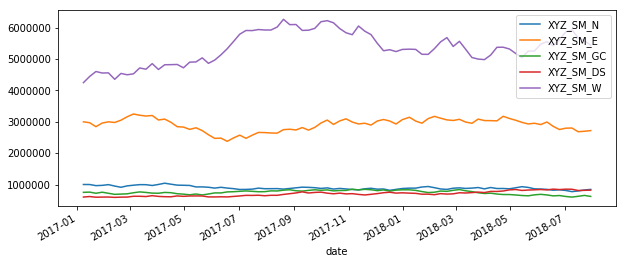

In [7]:
%matplotlib inline
df_edit.plot('date' , ['XYZ_SM_N','XYZ_SM_E','XYZ_SM_GC','XYZ_SM_DS','XYZ_SM_W'],
                                   figsize=(10 , 4)).legend(loc='best', fontsize=10)

## 2. Hierarchial Forecasting
### 2.1. Creating the graph
#### 2.1.1. Display number of elements for graph

In [8]:
CPG = ['XYZ Manufacturing','AAA Industries']
cpg = ['XYZ','AAA']
retailer = ['SuperMart' , 'BigCo' , 'Rx']
ret=['SM','BC','RX']
retailerRegion = ['North', 'East', 'South', 'West']
retailerXYZSMRegion = ['North', 'East', 'Gulf Coast', 'Deep South', 'West']
retailerAAASMRegion = ['East', 'Gulf Coast', 'Deep South', 'West']
retailerRegionz=['N','E','S','W']
(len(CPG)*len(retailer[1:])*len(retailerRegion))+(len(CPG[0:1])*len(retailer[0:1])*len(retailerXYZSMRegion))+(len(CPG[1:2])*len(retailer[0:1])*len(retailerAAASMRegion))

25

#### 2.1.2. Set levels, data and type of Hierarchy

In [9]:
rows_list = [];
for reg in retailerRegionz:
    for retail in ret:
        for indus in cpg:
            col=indus+"_"+retail+"_"+reg
            if(indus=='AAA' and retail=='SM' and reg=='N'):
                continue
            if(retail=='SM' and reg=='S'):
                col1=indus+"_"+retail+"_"+"GC"
                col2=indus+"_"+retail+"_"+"DS"
                rows_list.append([col1 , retail , indus , 'Total Sales']);
                rows_list.append([col2 , retail , indus , 'Total Sales']);
                continue
            rows_list.append([col , retail, indus , 'Total Sales']);
            
lLevels = ['Retailer Region'  ,'Retailer', 'CPG',  'Total Sales'];
lHierarchy = {};
lHierarchy['Levels'] = lLevels;
lHierarchy['Data'] = pd.DataFrame(rows_list, columns =  lLevels);
lHierarchy['Type'] = "Hierarchical"
print(lHierarchy['Data'])

   Retailer Region Retailer  CPG  Total Sales
0         XYZ_SM_N       SM  XYZ  Total Sales
1         XYZ_BC_N       BC  XYZ  Total Sales
2         AAA_BC_N       BC  AAA  Total Sales
3         XYZ_RX_N       RX  XYZ  Total Sales
4         AAA_RX_N       RX  AAA  Total Sales
5         XYZ_SM_E       SM  XYZ  Total Sales
6         AAA_SM_E       SM  AAA  Total Sales
7         XYZ_BC_E       BC  XYZ  Total Sales
8         AAA_BC_E       BC  AAA  Total Sales
9         XYZ_RX_E       RX  XYZ  Total Sales
10        AAA_RX_E       RX  AAA  Total Sales
11       XYZ_SM_GC       SM  XYZ  Total Sales
12       XYZ_SM_DS       SM  XYZ  Total Sales
13       AAA_SM_GC       SM  AAA  Total Sales
14       AAA_SM_DS       SM  AAA  Total Sales
15        XYZ_BC_S       BC  XYZ  Total Sales
16        AAA_BC_S       BC  AAA  Total Sales
17        XYZ_RX_S       RX  XYZ  Total Sales
18        AAA_RX_S       RX  AAA  Total Sales
19        XYZ_SM_W       SM  XYZ  Total Sales
20        AAA_SM_W       SM  AAA  

#### 2.1.3. Plot graph

INFO:pyaf.std:START_HIERARCHICAL_PLOTTING


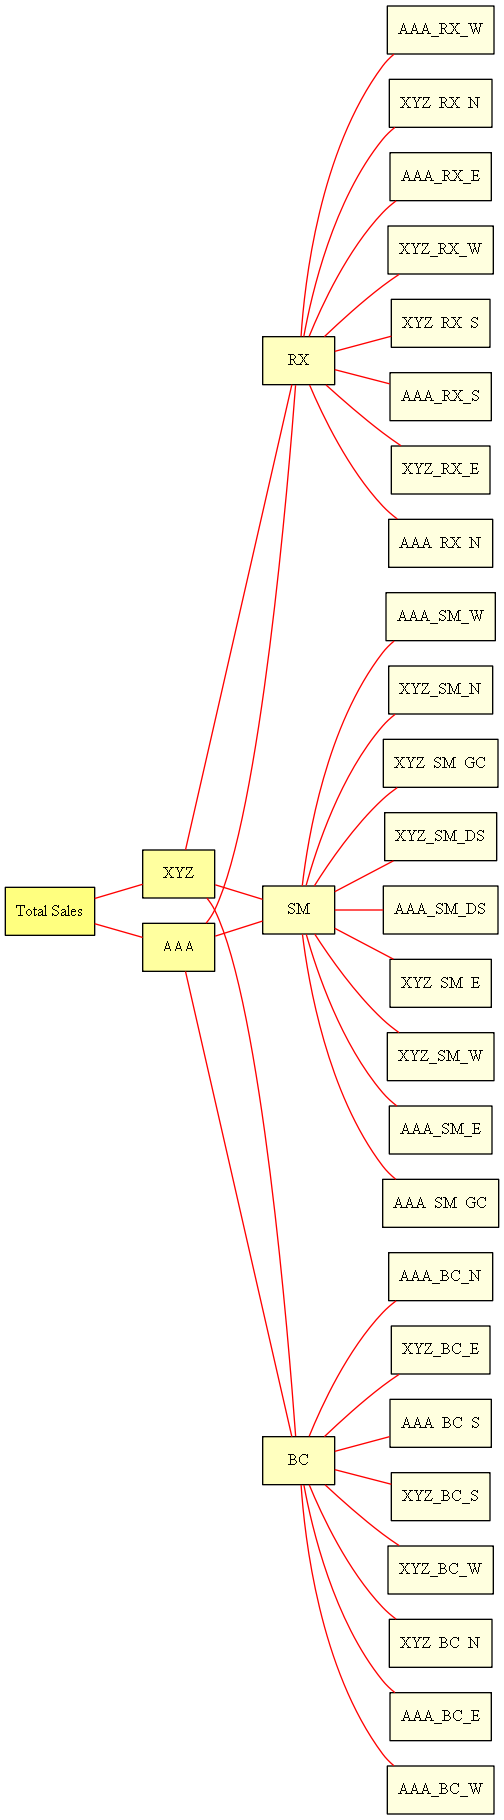

INFO:pyaf.std:END_HIERARCHICAL_PLOTTING_TIME_IN_SECONDS 1.9165279865264893


In [10]:
lEngine = hautof.cHierarchicalForecastEngine()


lSignalHierarchy = lEngine.plot_Hierarchy(df_edit , "Month", "Signal", 1, 
                                          lHierarchy, None);

#### 2.1.4. Structure of the graph

In [11]:
lSignalHierarchy.mStructure

{0: {'XYZ_SM_N': set(),
  'XYZ_BC_N': set(),
  'AAA_BC_N': set(),
  'XYZ_RX_N': set(),
  'AAA_RX_N': set(),
  'XYZ_SM_E': set(),
  'AAA_SM_E': set(),
  'XYZ_BC_E': set(),
  'AAA_BC_E': set(),
  'XYZ_RX_E': set(),
  'AAA_RX_E': set(),
  'XYZ_SM_GC': set(),
  'XYZ_SM_DS': set(),
  'AAA_SM_GC': set(),
  'AAA_SM_DS': set(),
  'XYZ_BC_S': set(),
  'AAA_BC_S': set(),
  'XYZ_RX_S': set(),
  'AAA_RX_S': set(),
  'XYZ_SM_W': set(),
  'AAA_SM_W': set(),
  'XYZ_BC_W': set(),
  'AAA_BC_W': set(),
  'XYZ_RX_W': set(),
  'AAA_RX_W': set()},
 1: {'SM': {'AAA_SM_DS',
   'AAA_SM_E',
   'AAA_SM_GC',
   'AAA_SM_W',
   'XYZ_SM_DS',
   'XYZ_SM_E',
   'XYZ_SM_GC',
   'XYZ_SM_N',
   'XYZ_SM_W'},
  'BC': {'AAA_BC_E',
   'AAA_BC_N',
   'AAA_BC_S',
   'AAA_BC_W',
   'XYZ_BC_E',
   'XYZ_BC_N',
   'XYZ_BC_S',
   'XYZ_BC_W'},
  'RX': {'AAA_RX_E',
   'AAA_RX_N',
   'AAA_RX_S',
   'AAA_RX_W',
   'XYZ_RX_E',
   'XYZ_RX_N',
   'XYZ_RX_S',
   'XYZ_RX_W'}},
 2: {'XYZ': {'BC', 'RX', 'SM'}, 'AAA': {'BC', 'RX', 'SM'}},
 3:

### 2.2 Train model

In [12]:
# create a hierarchical model and train it
lEngine = hautof.cHierarchicalForecastEngine()
lDateColumn='date'
lSignalVar = "Sales";

N = df_edit.shape[0];
#H = 26*5;
#H=4
#train_df = df_edit.head(N-H);
train_df = df_edit.head(N);


lSignalHierarchy = lEngine.train(train_df , lDateColumn, lSignalVar, 1, lHierarchy, None);

INFO:pyaf.std:START_HIERARCHICAL_TRAINING
INFO:pyaf.hierarchical:TRAINING_MODEL_LEVEL_SIGNAL 0 AAA_BC_E
INFO:pyaf.std:START_TRAINING 'AAA_BC_E'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'AAA_BC_E' 10.801888465881348
INFO:pyaf.std:TIME_DETAIL TimeVariable='date' TimeMin=2017-01-08T00:00:00.000000 TimeMax=2018-03-26T00:00:00.000000 TimeDelta=<DateOffset: days=7> Horizon=1
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AAA_BC_E' Min=768348.29 Max=1014254.81  Mean=871365.3967073171 StdDev=64230.163102252765
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AAA_BC_E' Min=768348.29 Max=1014254.81  Mean=871365.3967073171 StdDev=64230.163102252765
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AAA_BC_E_ConstantTrend_residue_zeroCycle_residue_AR(20)' [ConstantTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_AAA_BC_E_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_AAA_BC_E_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std

INFO:pyaf.std:MODEL_L1 L1_Fit=63481.909872795746 L1_Forecast=145084.1503279574 L1_Test=245143.00945171155
INFO:pyaf.std:MODEL_L2 L2_Fit=76321.47193284002 L2_Forecast=171225.37786571088 L2_Test=245143.00945171155
INFO:pyaf.std:MODEL_COMPLEXITY 16
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:pyaf.std:AR_MODEL_COEFF 1 _AAA_BC_W_ConstantTrend_residue_zeroCycle_residue_Lag1 0.9835371435397582
INFO:pyaf.std:AR_MODEL_COEFF 2 _AAA_BC_W_ConstantTrend_residue_zeroCycle_residue_Lag19 0.4519996836309943
INFO:pyaf.std:AR_MODEL_COEFF 3 _AAA_BC_W_ConstantTrend_residue_zeroCycle_residue_Lag18 -0.37044066183891344
INFO:pyaf.std:AR_MODEL_COEFF 4 _AAA_BC_W_ConstantTrend_residue_zeroCycle_residue_Lag9 -0.32421940959414136
INFO:pyaf.std:AR_MODEL_COEFF 5 _AAA_BC_W_ConstantTrend_residue_zeroCycle_residue_Lag3 0.2883047927460455
INFO:pyaf.std:AR_MODEL_COEFF 6 _AAA_BC_W_ConstantTrend_residue_zeroCycle_residue_Lag10 0.28303896805839635
INFO:pyaf.std:AR_MODEL_COEFF 7 _AAA_BC_W_ConstantTrend_residue_zeroCycle_residue

INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.hierarchical:TRAINING_MODEL_LEVEL_SIGNAL 0 AAA_RX_W
INFO:pyaf.std:START_TRAINING 'AAA_RX_W'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'AAA_RX_W' 4.395021915435791
INFO:pyaf.std:TIME_DETAIL TimeVariable='date' TimeMin=2017-01-08T00:00:00.000000 TimeMax=2018-03-26T00:00:00.000000 TimeDelta=<DateOffset: days=7> Horizon=1
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AAA_RX_W' Min=648039.5 Max=904597.5  Mean=805586.1213414634 StdDev=65790.23274487098
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AAA_RX_W' Min=648039.5 Max=904597.5  Mean=805586.1213414634 StdDev=65790.23274487098
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AAA_RX_W_ConstantTrend_residue_zeroCycle_residue_AR(20)' [ConstantTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_AAA_RX_W_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_AAA_RX_W_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '

INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AAA_SM_GC' Min=1935691.75 Max=2933763.22  Mean=2233986.7735365857 StdDev=216395.10175715675
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AAA_SM_GC' Min=1935691.75 Max=2933763.22  Mean=2233986.7735365857 StdDev=216395.10175715675
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AAA_SM_GC_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR' [ConstantTrend + Seasonal_DayOfWeek + NoAR]
INFO:pyaf.std:TREND_DETAIL '_AAA_SM_GC_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_AAA_SM_GC_ConstantTrend_residue_Seasonal_DayOfWeek' [Seasonal_DayOfWeek]
INFO:pyaf.std:AUTOREG_DETAIL '_AAA_SM_GC_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0755 MAPE_Forecast=0.0318 MAPE_Test=0.0658
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0758 SMAPE_Forecast=0.0317 SMAPE_Test=0.0681
INFO:pyaf.std:MODEL_MASE MASE_Fit=2.9821 MASE_Forecast=1.3315 MASE_Test=N

INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0204 SMAPE_Forecast=0.0271 SMAPE_Test=0.0207
INFO:pyaf.std:MODEL_MASE MASE_Fit=0.7827 MASE_Forecast=1.1816 MASE_Test=None
INFO:pyaf.std:MODEL_L1 L1_Fit=29665.490652546872 L1_Forecast=37088.66350165486 L1_Test=31375.883031413425
INFO:pyaf.std:MODEL_L2 L2_Fit=36359.5728731477 L2_Forecast=46394.88214666122 L2_Test=31375.883031413425
INFO:pyaf.std:MODEL_COMPLEXITY 16
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:pyaf.std:AR_MODEL_COEFF 1 _XYZ_BC_S_ConstantTrend_residue_zeroCycle_residue_Lag1 0.9348597430129577
INFO:pyaf.std:AR_MODEL_COEFF 2 _XYZ_BC_S_ConstantTrend_residue_zeroCycle_residue_Lag15 -0.34378128398792507
INFO:pyaf.std:AR_MODEL_COEFF 3 _XYZ_BC_S_ConstantTrend_residue_zeroCycle_residue_Lag11 -0.23103819634627046
INFO:pyaf.std:AR_MODEL_COEFF 4 _XYZ_BC_S_ConstantTrend_residue_zeroCycle_residue_Lag16 0.21336829150115444
INFO:pyaf.std:AR_MODEL_COEFF 5 _XYZ_BC_S_ConstantTrend_residue_zeroCycle_residue_Lag3 -0.20962029039821967
INFO:pyaf.std:AR_MODEL_CO

INFO:pyaf.std:AR_MODEL_COEFF 9 _XYZ_RX_N_ConstantTrend_residue_Seasonal_DayOfWeek_residue_Lag6 -0.18159206057541313
INFO:pyaf.std:AR_MODEL_COEFF 10 _XYZ_RX_N_ConstantTrend_residue_Seasonal_DayOfWeek_residue_Lag2 -0.1461059714560036
INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.hierarchical:TRAINING_MODEL_LEVEL_SIGNAL 0 XYZ_RX_S
INFO:pyaf.std:START_TRAINING 'XYZ_RX_S'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'XYZ_RX_S' 3.092292547225952
INFO:pyaf.std:TIME_DETAIL TimeVariable='date' TimeMin=2017-01-08T00:00:00.000000 TimeMax=2018-03-26T00:00:00.000000 TimeDelta=<DateOffset: days=7> Horizon=1
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='XYZ_RX_S' Min=784903.43 Max=1124292.49  Mean=915269.3907317074 StdDev=85180.99063879586
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_XYZ_RX_S' Min=784903.43 Max=1124292.49  Mean=915269.3907317074 StdDev=85180.99063879586
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_XYZ_RX_S_Lag1Trend_residue_zer

INFO:pyaf.std:AR_MODEL_COEFF 6 _XYZ_SM_E_ConstantTrend_residue_zeroCycle_residue_Lag18 -0.19301078458266807
INFO:pyaf.std:AR_MODEL_COEFF 7 _XYZ_SM_E_ConstantTrend_residue_zeroCycle_residue_Lag5 -0.15636092459307796
INFO:pyaf.std:AR_MODEL_COEFF 8 _XYZ_SM_E_ConstantTrend_residue_zeroCycle_residue_Lag17 0.12607336568331817
INFO:pyaf.std:AR_MODEL_COEFF 9 _XYZ_SM_E_ConstantTrend_residue_zeroCycle_residue_Lag6 -0.06522889903414428
INFO:pyaf.std:AR_MODEL_COEFF 10 _XYZ_SM_E_ConstantTrend_residue_zeroCycle_residue_Lag15 -0.0634931365169033
INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.hierarchical:TRAINING_MODEL_LEVEL_SIGNAL 0 XYZ_SM_GC
INFO:pyaf.std:START_TRAINING 'XYZ_SM_GC'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'XYZ_SM_GC' 3.1000208854675293
INFO:pyaf.std:TIME_DETAIL TimeVariable='date' TimeMin=2017-01-08T00:00:00.000000 TimeMax=2018-03-26T00:00:00.000000 TimeDelta=<DateOffset: days=7> Horizon=1
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='XYZ_SM_GC' Min=598497.94 Max=849445.0  Mean=7

INFO:pyaf.std:AR_MODEL_COEFF 9 _XYZ_SM_W_ConstantTrend_residue_zeroCycle_residue_Lag4 0.1349012580938458
INFO:pyaf.std:AR_MODEL_COEFF 10 _XYZ_SM_W_ConstantTrend_residue_zeroCycle_residue_Lag5 0.12811774348117883
INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.hierarchical:TRAINING_MODEL_LEVEL_SIGNAL 1 BC
INFO:pyaf.std:START_TRAINING 'BC'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'BC' 3.1751747131347656
INFO:pyaf.std:TIME_DETAIL TimeVariable='date' TimeMin=2017-01-08T00:00:00.000000 TimeMax=2018-03-26T00:00:00.000000 TimeDelta=<DateOffset: days=7> Horizon=1
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='BC' Min=20826678.81 Max=25506704.89  Mean=23587115.134512194 StdDev=1229979.192092193
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_BC' Min=20826678.81 Max=25506704.89  Mean=23587115.134512194 StdDev=1229979.192092193
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_BC_PolyTrend_residue_zeroCycle_residue_NoAR' [PolyTrend + NoCycle + NoA

INFO:pyaf.std:MODEL_COMPLEXITY 4
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.hierarchical:TRAINING_MODEL_LEVEL_SIGNAL 3 Total Sales
INFO:pyaf.std:START_TRAINING 'Total Sales'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Total Sales' 3.131385564804077
INFO:pyaf.std:TIME_DETAIL TimeVariable='date' TimeMin=2017-01-08T00:00:00.000000 TimeMax=2018-03-26T00:00:00.000000 TimeDelta=<DateOffset: days=7> Horizon=1
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Total Sales' Min=87117520.24 Max=98089896.96000001  Mean=93583390.3902439 StdDev=3232972.205501197
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Total Sales' Min=87117520.24 Max=98089896.96000001  Mean=93583390.3902439 StdDev=3232972.205501197
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Total Sales_ConstantTrend_residue_Seasonal_DayOfWeek_residue_NoAR' [ConstantTrend + Seasonal_DayOfWeek + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Total Sales_ConstantTr

INFO:pyaf.std:REPORT_COMBINED_FORECASTS_VALID_PERF ('AAA_BC_S_BU', 59154.633149416346, 0.0235, 59154.633149416346, 0.0235)
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_FIT_PERF ('AAA_BC_W_BU', 76321.47193284002, 0.0174, 76321.47193284002, 0.0174)
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_VALID_PERF ('AAA_BC_W_BU', 171225.37786571088, 0.0342, 171225.37786571088, 0.0342)
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_FIT_PERF ('AAA_BU', 1585055.4865275866, 0.0297, 501930.15783162025, 0.0083)
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_VALID_PERF ('AAA_BU', 711283.1611120056, 0.0131, 506635.40257501515, 0.0087)
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_FIT_PERF ('AAA_RX_E_BU', 31888.11396321205, 0.0386, 31888.11396321205, 0.0386)
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_VALID_PERF ('AAA_RX_E_BU', 20596.974335741186, 0.0216, 20596.974335741186, 0.0216)
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_FIT_PERF ('AAA_RX_N_BU', 8366.758792698964, 0.018, 8366.758792698964, 0.018)
INFO:pyaf.std:REPORT_COMBINED_FORECASTS_VAL

#### 2.2.1. Display Info of trained model

In [13]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 26 columns):
date         82 non-null datetime64[ns]
XYZ_SM_N     82 non-null float64
XYZ_SM_E     82 non-null float64
XYZ_SM_GC    82 non-null float64
XYZ_SM_DS    82 non-null float64
XYZ_SM_W     82 non-null float64
AAA_SM_E     82 non-null float64
AAA_SM_GC    82 non-null float64
AAA_SM_DS    82 non-null float64
AAA_SM_W     82 non-null float64
XYZ_BC_N     82 non-null float64
XYZ_BC_E     82 non-null float64
XYZ_BC_S     82 non-null float64
XYZ_BC_W     82 non-null float64
AAA_BC_N     82 non-null float64
AAA_BC_E     82 non-null float64
AAA_BC_S     82 non-null float64
AAA_BC_W     82 non-null float64
XYZ_RX_N     82 non-null float64
XYZ_RX_E     82 non-null float64
XYZ_RX_S     82 non-null float64
XYZ_RX_W     82 non-null float64
AAA_RX_N     82 non-null float64
AAA_RX_E     82 non-null float64
AAA_RX_S     82 non-null float64
AAA_RX_W     82 non-null float64
dtypes: datetime64[ns](1), float

In [14]:
lInfo = lEngine.to_json()
lInfo.keys()

dict_keys(['Structure', 'Models'])

In [15]:
lInfo['Structure']

{0: {'XYZ_SM_N': set(),
  'XYZ_BC_N': set(),
  'AAA_BC_N': set(),
  'XYZ_RX_N': set(),
  'AAA_RX_N': set(),
  'XYZ_SM_E': set(),
  'AAA_SM_E': set(),
  'XYZ_BC_E': set(),
  'AAA_BC_E': set(),
  'XYZ_RX_E': set(),
  'AAA_RX_E': set(),
  'XYZ_SM_GC': set(),
  'XYZ_SM_DS': set(),
  'AAA_SM_GC': set(),
  'AAA_SM_DS': set(),
  'XYZ_BC_S': set(),
  'AAA_BC_S': set(),
  'XYZ_RX_S': set(),
  'AAA_RX_S': set(),
  'XYZ_SM_W': set(),
  'AAA_SM_W': set(),
  'XYZ_BC_W': set(),
  'AAA_BC_W': set(),
  'XYZ_RX_W': set(),
  'AAA_RX_W': set()},
 1: {'SM': {'AAA_SM_DS',
   'AAA_SM_E',
   'AAA_SM_GC',
   'AAA_SM_W',
   'XYZ_SM_DS',
   'XYZ_SM_E',
   'XYZ_SM_GC',
   'XYZ_SM_N',
   'XYZ_SM_W'},
  'BC': {'AAA_BC_E',
   'AAA_BC_N',
   'AAA_BC_S',
   'AAA_BC_W',
   'XYZ_BC_E',
   'XYZ_BC_N',
   'XYZ_BC_S',
   'XYZ_BC_W'},
  'RX': {'AAA_RX_E',
   'AAA_RX_N',
   'AAA_RX_S',
   'AAA_RX_W',
   'XYZ_RX_E',
   'XYZ_RX_N',
   'XYZ_RX_S',
   'XYZ_RX_W'}},
 2: {'XYZ': {'BC', 'RX', 'SM'}, 'AAA': {'BC', 'RX', 'SM'}},
 3:

In [16]:
lInfo['Models'].keys()

dict_keys(['AAA_BC_E', 'AAA_BC_N', 'AAA_BC_S', 'AAA_BC_W', 'AAA_RX_E', 'AAA_RX_N', 'AAA_RX_S', 'AAA_RX_W', 'AAA_SM_DS', 'AAA_SM_E', 'AAA_SM_GC', 'AAA_SM_W', 'XYZ_BC_E', 'XYZ_BC_N', 'XYZ_BC_S', 'XYZ_BC_W', 'XYZ_RX_E', 'XYZ_RX_N', 'XYZ_RX_S', 'XYZ_RX_W', 'XYZ_SM_DS', 'XYZ_SM_E', 'XYZ_SM_GC', 'XYZ_SM_N', 'XYZ_SM_W', 'BC', 'RX', 'SM', 'AAA', 'XYZ', 'Total Sales'])

#### 2.2.2. Display info of element XYZ, Supermart, East Region

In [17]:
lInfo['Models']['XYZ_SM_E']

{'Dataset': {'Time': {'TimeVariable': 'date',
   'TimeMinMax': ['2017-01-08 00:00:00', '2018-07-30 00:00:00'],
   'Horizon': 1},
  'Signal': 'XYZ_SM_E',
  'Training_Signal_Length': 82},
 'Model': {'Best_Decomposition': '_XYZ_SM_E_ConstantTrend_residue_zeroCycle_residue_AR(20)',
  'Signal_Transoformation': 'NoTransf',
  'Trend': 'ConstantTrend',
  'Cycle': 'NoCycle',
  'AR_Model': 'AR'},
 'Model_Performance': {'MAPE': '0.0215',
  'MASE': '1.0504',
  'MAE': '63443.95957069206',
  'RMSE': '76795.48827976442',
  'COMPLEXITY': '16'}}

#### 2.2.3 Set RMSE and MAPE values for graph

In [18]:
perfs = [];
for model in sorted(lInfo['Models'].keys()):
    lPerf = lInfo['Models'][model]['Model_Performance']
    perfs.append([model , lPerf['RMSE'] , lPerf['MAPE']])
df_perf = pd.DataFrame(perfs , columns=['Model' , 'RMSE' , 'MAPE']);
df_perf = df_perf.sort_values(by = ['MAPE'])
print(df_perf)

          Model                RMSE    MAPE
15           SM   260269.1288177549  0.0121
17          XYZ   711283.1611120056  0.0131
16  Total Sales  1422566.3222240112  0.0131
0           AAA   711283.1611120056  0.0131
14           RX   95261.37635872682  0.0149
13           BC   554477.8810711273  0.0184
27     XYZ_SM_E   76795.48827976442  0.0215
5      AAA_RX_E  20596.974335741186  0.0216
1      AAA_BC_E  24921.773141342197  0.0218
8      AAA_RX_W  23160.943423114342  0.0218
10     AAA_SM_E    43272.4035718537  0.0221
22     XYZ_RX_E  26810.494144920445  0.0232
3      AAA_BC_S  59154.633149416346  0.0235
6      AAA_RX_N    9870.48244697707   0.024
26    XYZ_SM_DS  24050.515318042748  0.0248
24     XYZ_RX_S   31396.01865187481   0.026
18     XYZ_BC_E   34224.19057582403   0.026
9     AAA_SM_DS  15663.338441092988  0.0262
20     XYZ_BC_S   46394.88214666122  0.0268
2      AAA_BC_N   281388.8451894265  0.0268
29     XYZ_SM_N   27567.68217010562  0.0292
7      AAA_RX_S  27529.376256146

#### 2.2.4. Plot Graph with RMSE and MAPE

INFO:pyaf.std:START_HIERARCHICAL_PLOTTING


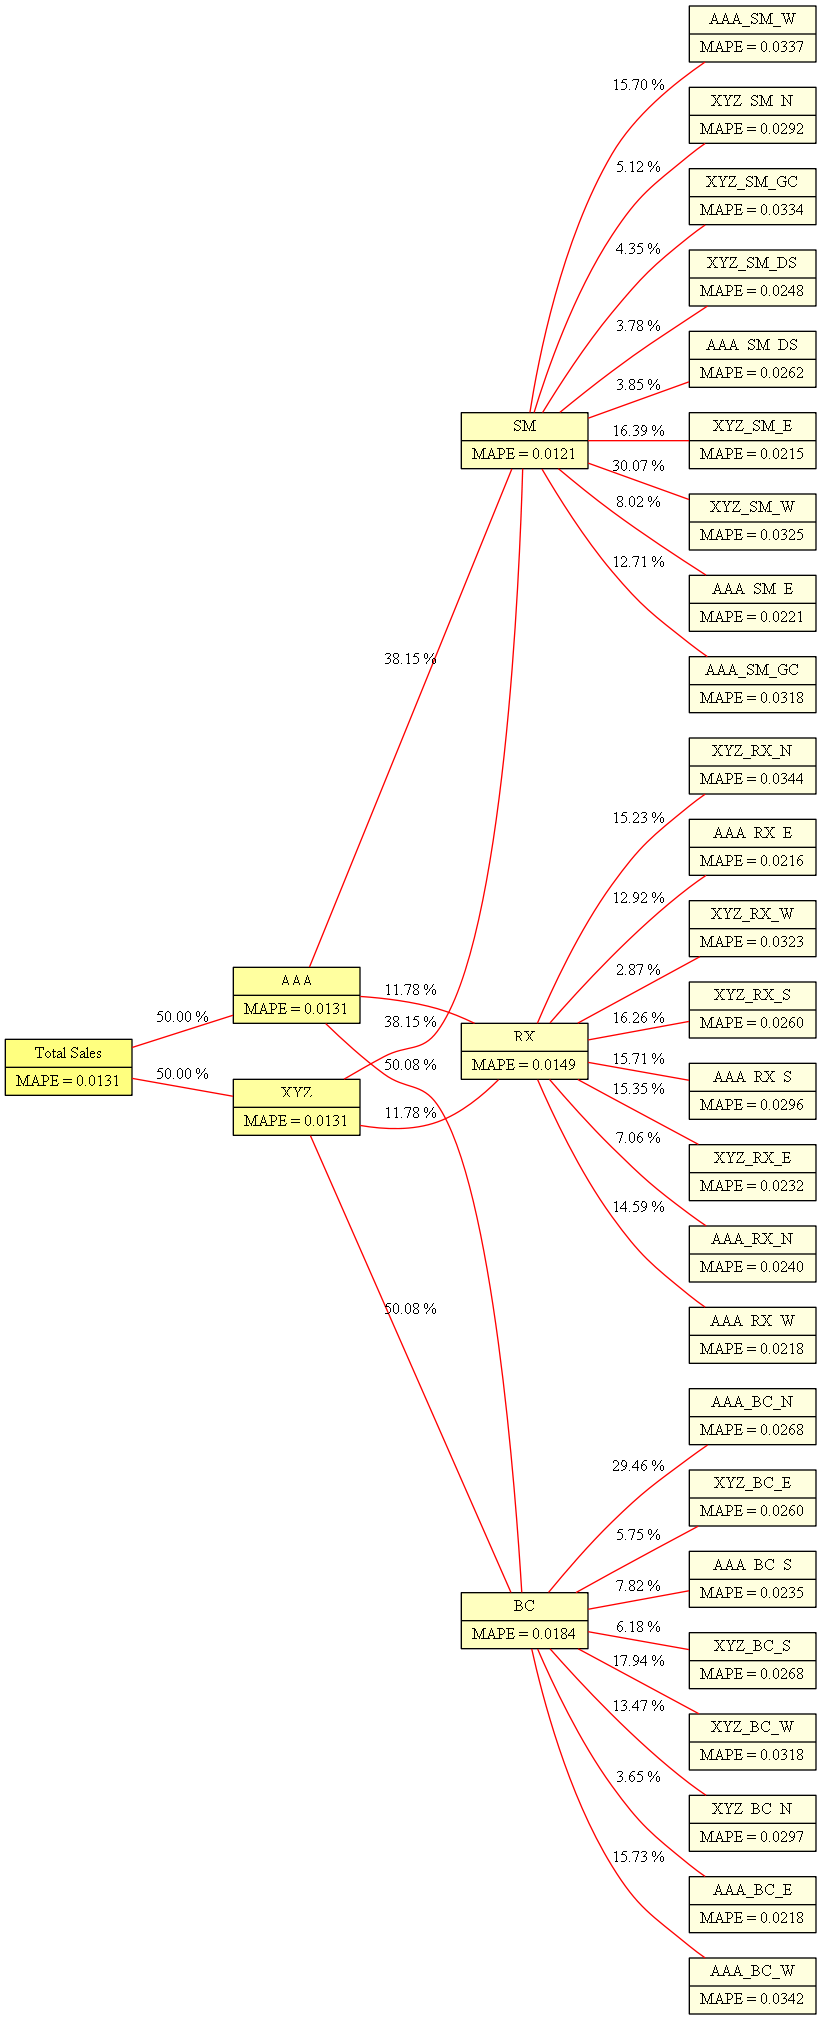

INFO:pyaf.std:END_HIERARCHICAL_PLOTTING_TIME_IN_SECONDS 0.6661324501037598


In [19]:
lEngine.mSignalHierarchy.plot()

### 2.3 Display Model Info and standard Plots

In [20]:
Sales_Engine = lEngine.mSignalHierarchy.mModels[0]['XYZ_SM_E']
Sales_Engine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='date' TimeMin=2017-01-08T00:00:00.000000 TimeMax=2018-03-26T00:00:00.000000 TimeDelta=<DateOffset: days=7> Horizon=1
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='XYZ_SM_E' Min=2377258.38 Max=3249221.37  Mean=2906866.8420731705 StdDev=198707.838835766
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_XYZ_SM_E' Min=2377258.38 Max=3249221.37  Mean=2906866.8420731705 StdDev=198707.838835766
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_XYZ_SM_E_ConstantTrend_residue_zeroCycle_residue_AR(20)' [ConstantTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_XYZ_SM_E_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_XYZ_SM_E_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_XYZ_SM_E_ConstantTrend_residue_zeroCycle_residue_AR(20)' [AR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.022 MAPE_Forecast=0.0215 MAPE_Test=0.0023
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.022 SMAPE_Forecast=0.

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 0.6658062934875488


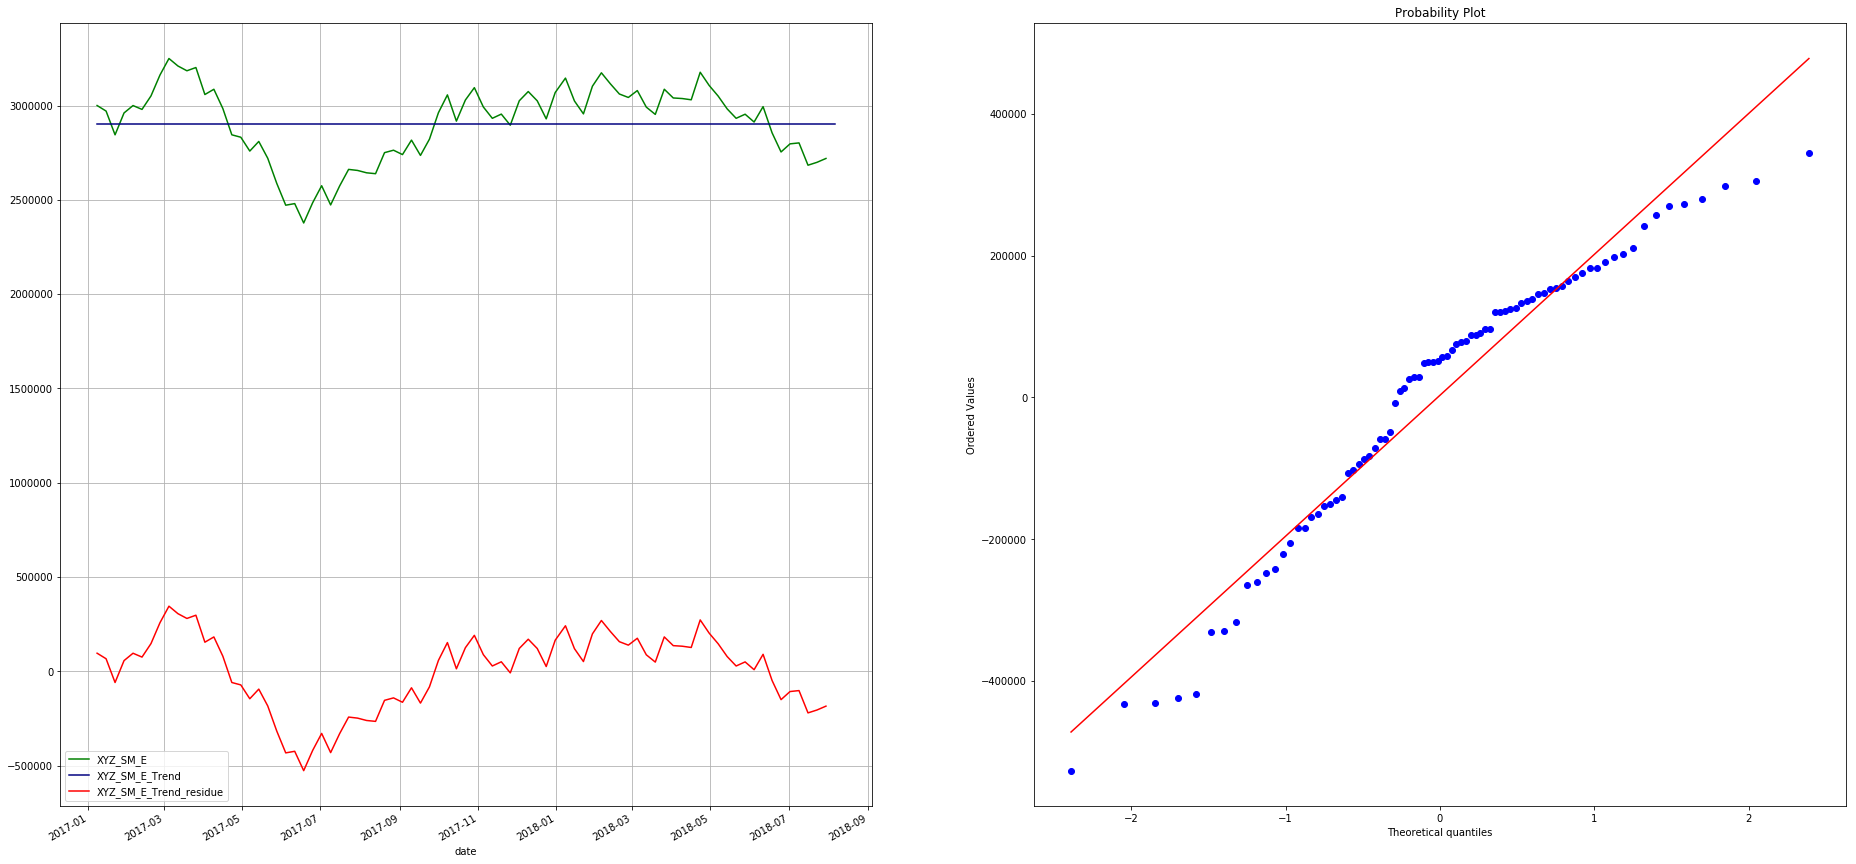

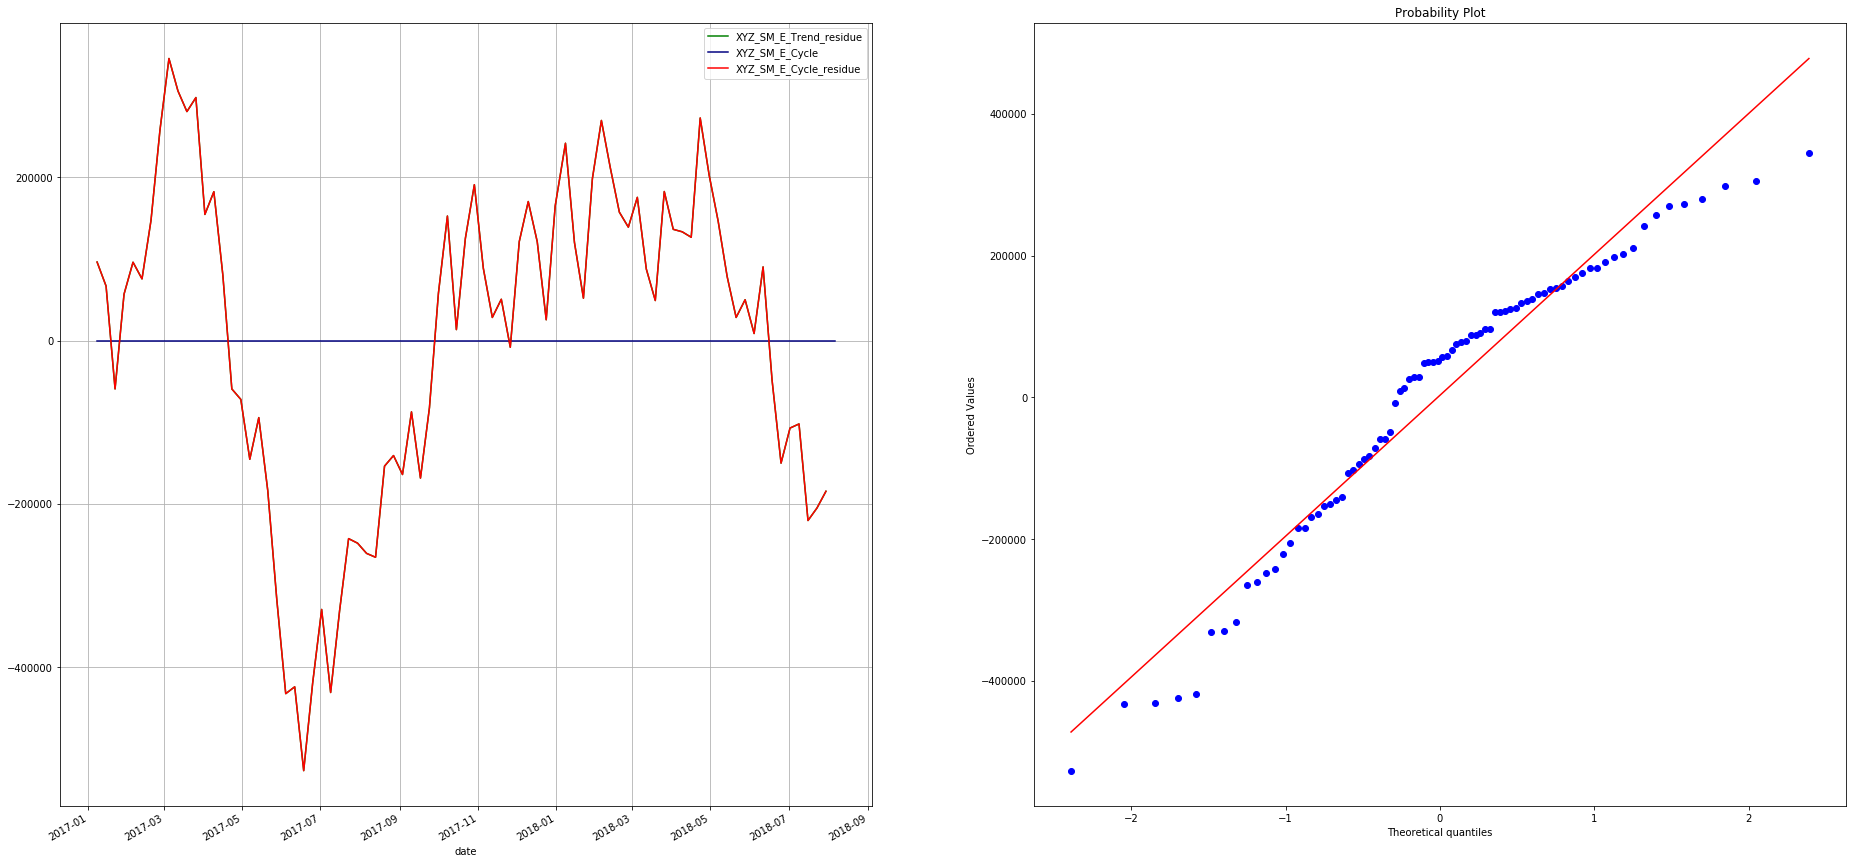

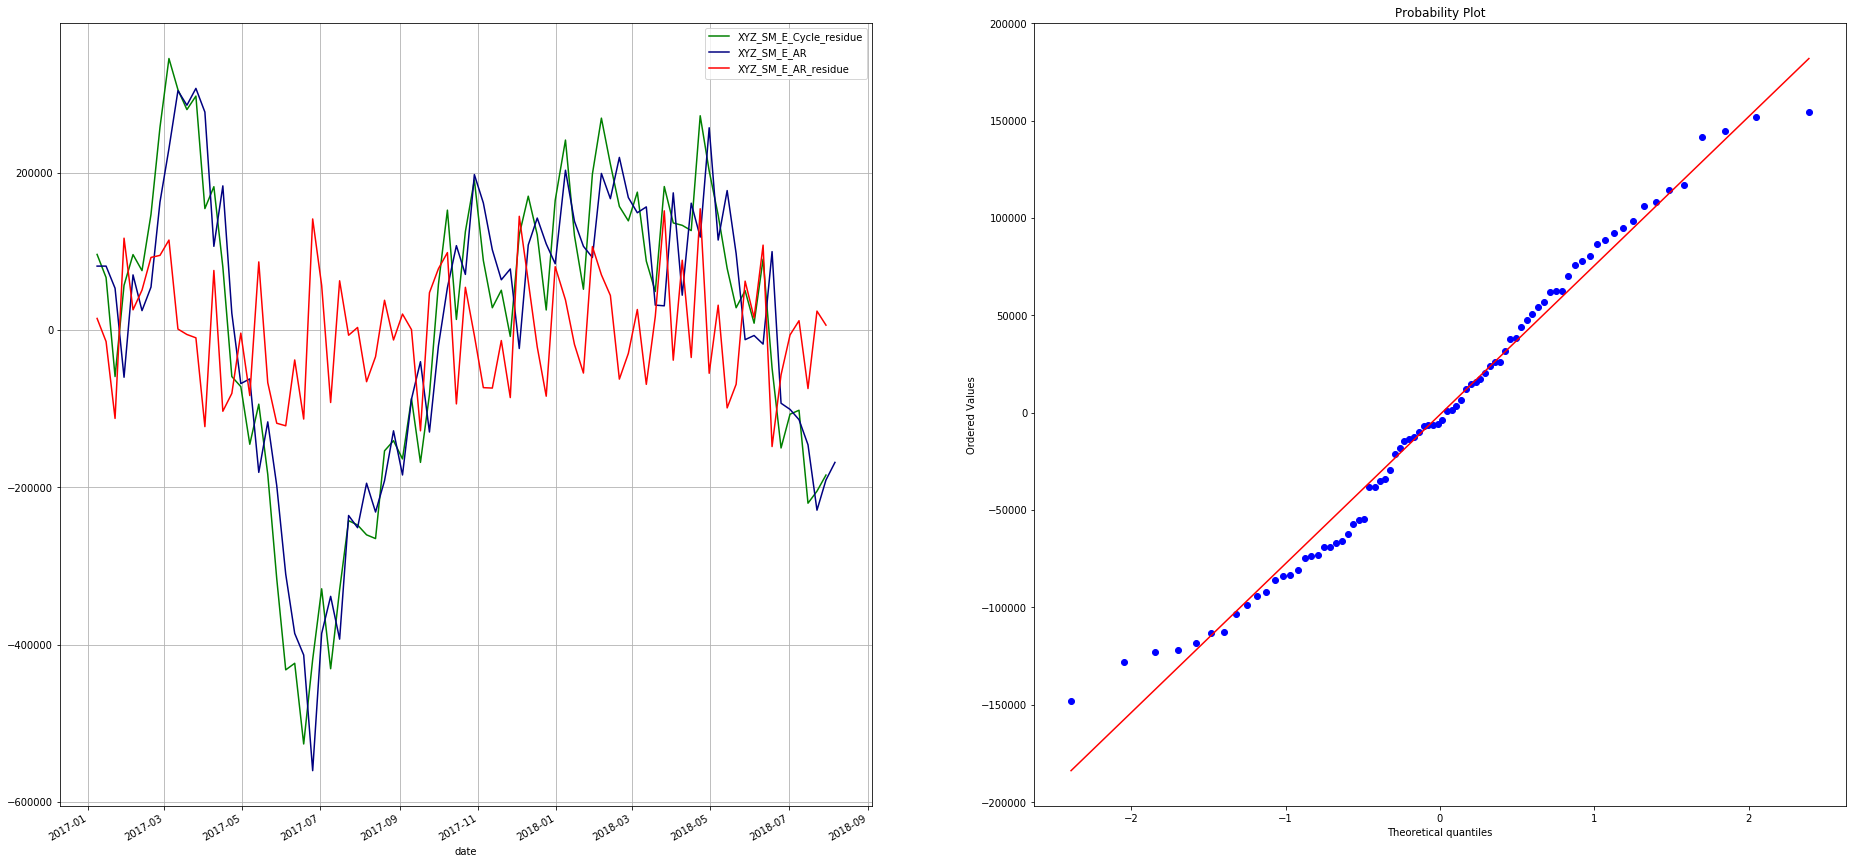

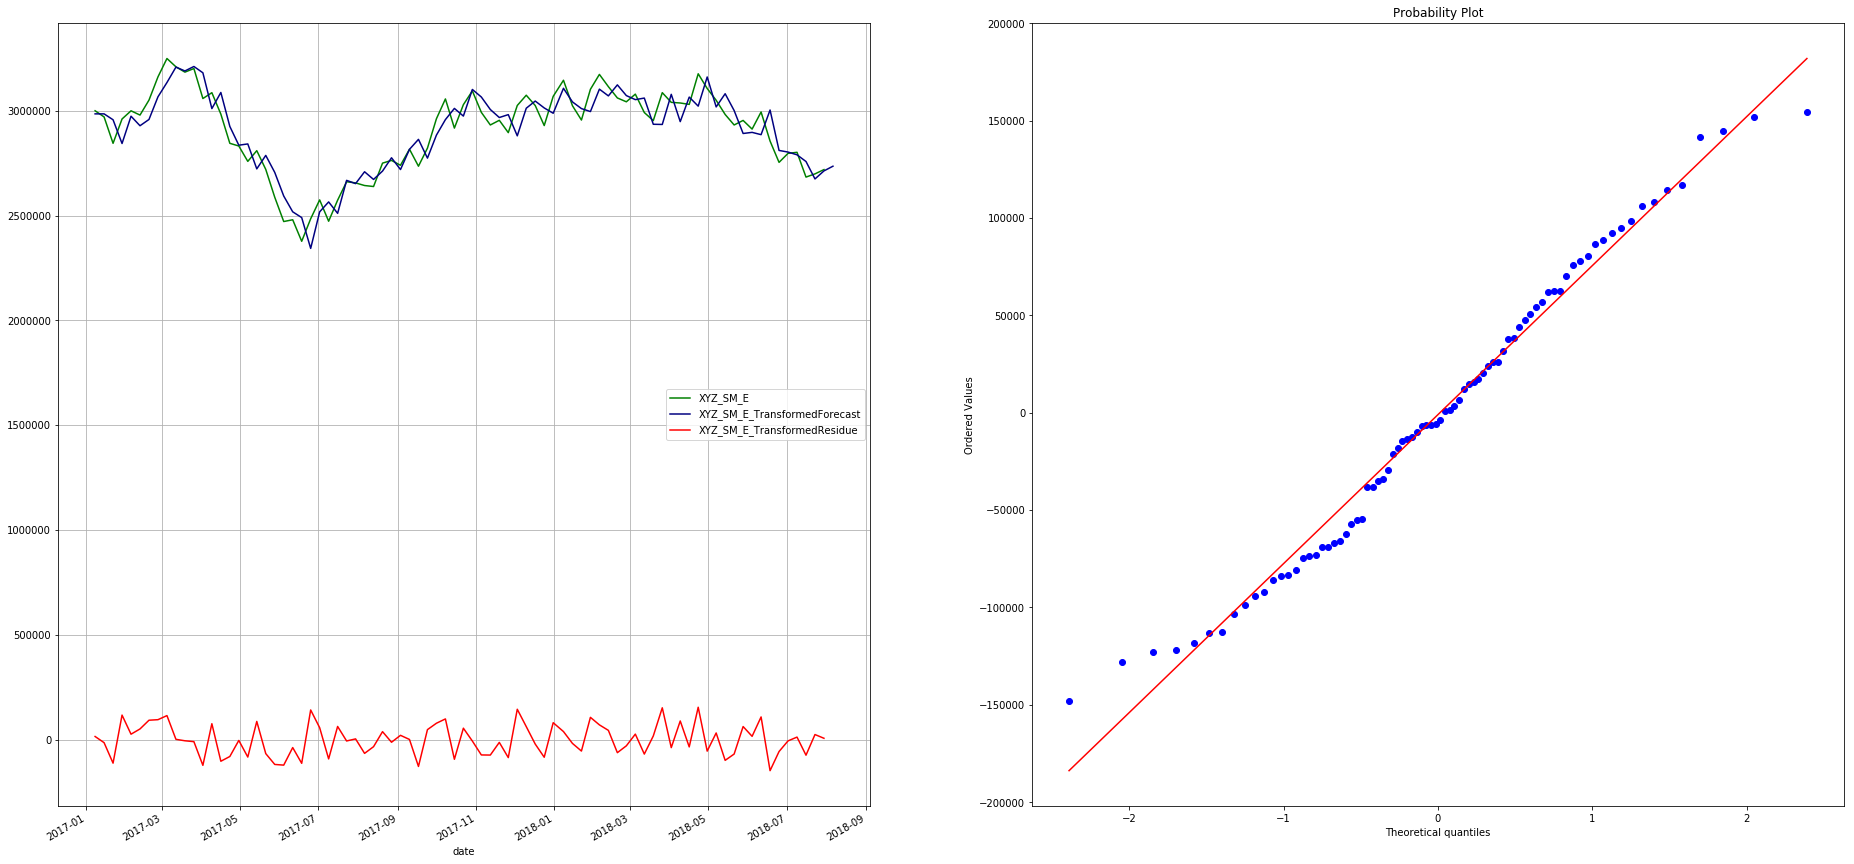

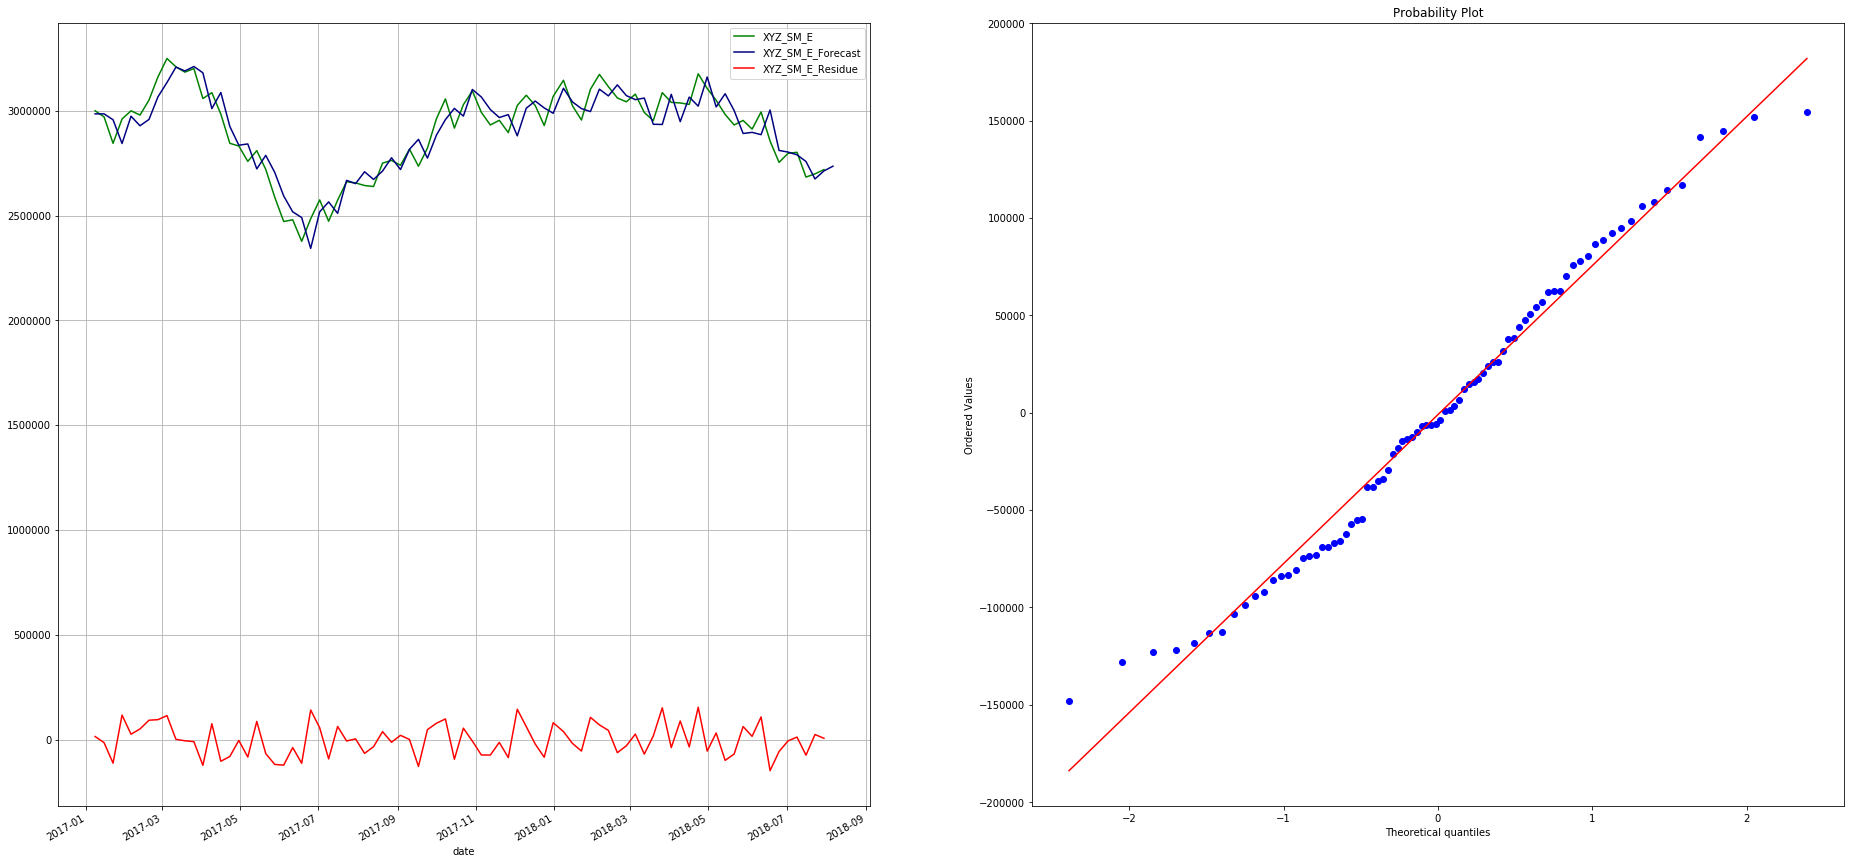

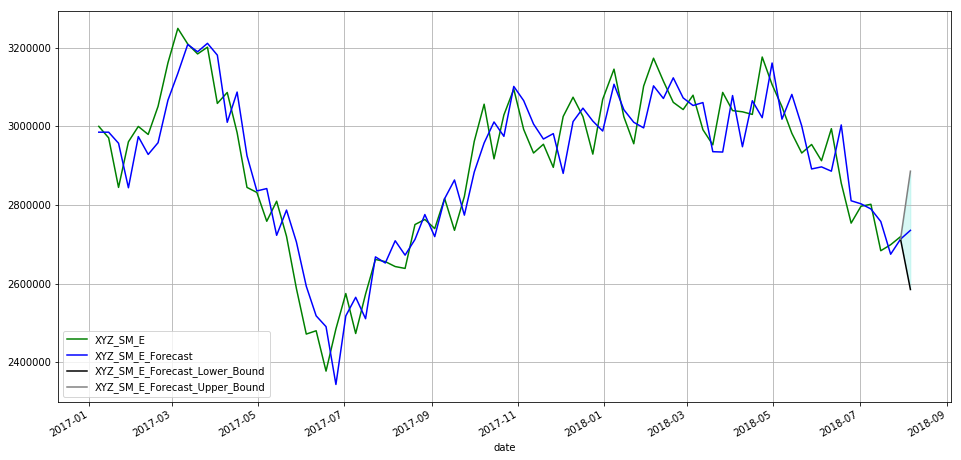

In [21]:
Sales_Engine.standardPlots()

### 2.4. Bottom-up Hierarchial Forecasting
#### 2.4.1. Train the BU model

In [22]:
lEngine.mOptions.mHierarchicalCombinationMethod = ["BU" , 'TD' , 'MO' , 'OC'];
#lEngine.mOptions.mHierarchicalCombinationMethod = ["BU"]
H=25
dfapp_out = lEngine.forecast(train_df, H);

INFO:pyaf.std:START_HIERARCHICAL_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.341191530227661
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.302722454071045
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 1.9669322967529297
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.290294647216797
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 1.9924166202545166
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.293435573577881
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.2987794876098633
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.300262451171875
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.3010988235473633
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.346475839614868
INFO:pyaf.std:START_F

## 3. Graphs
### 3.1. Graphs for all Retailer Regions

D:\Anaconda\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


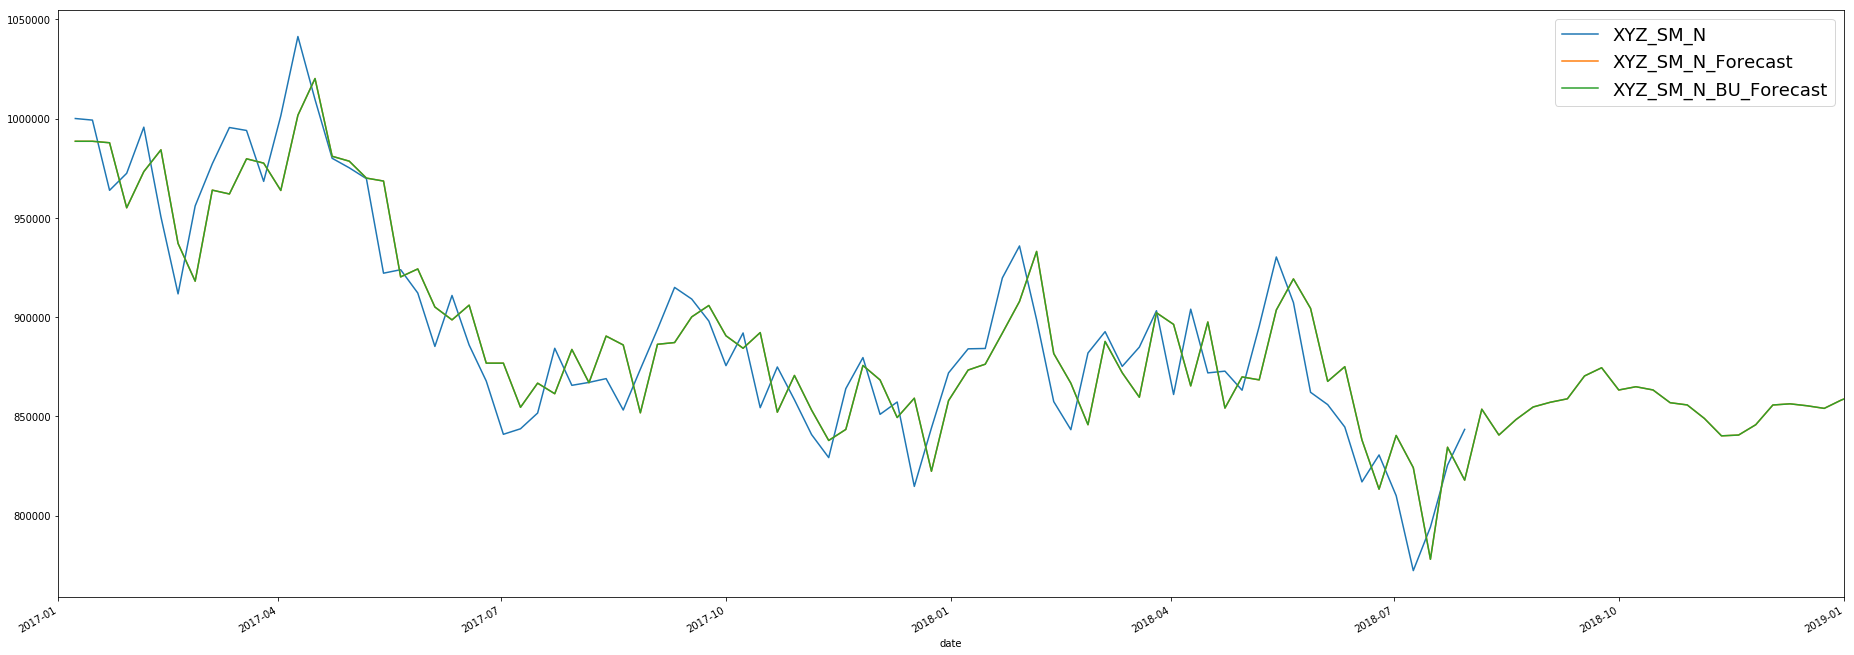

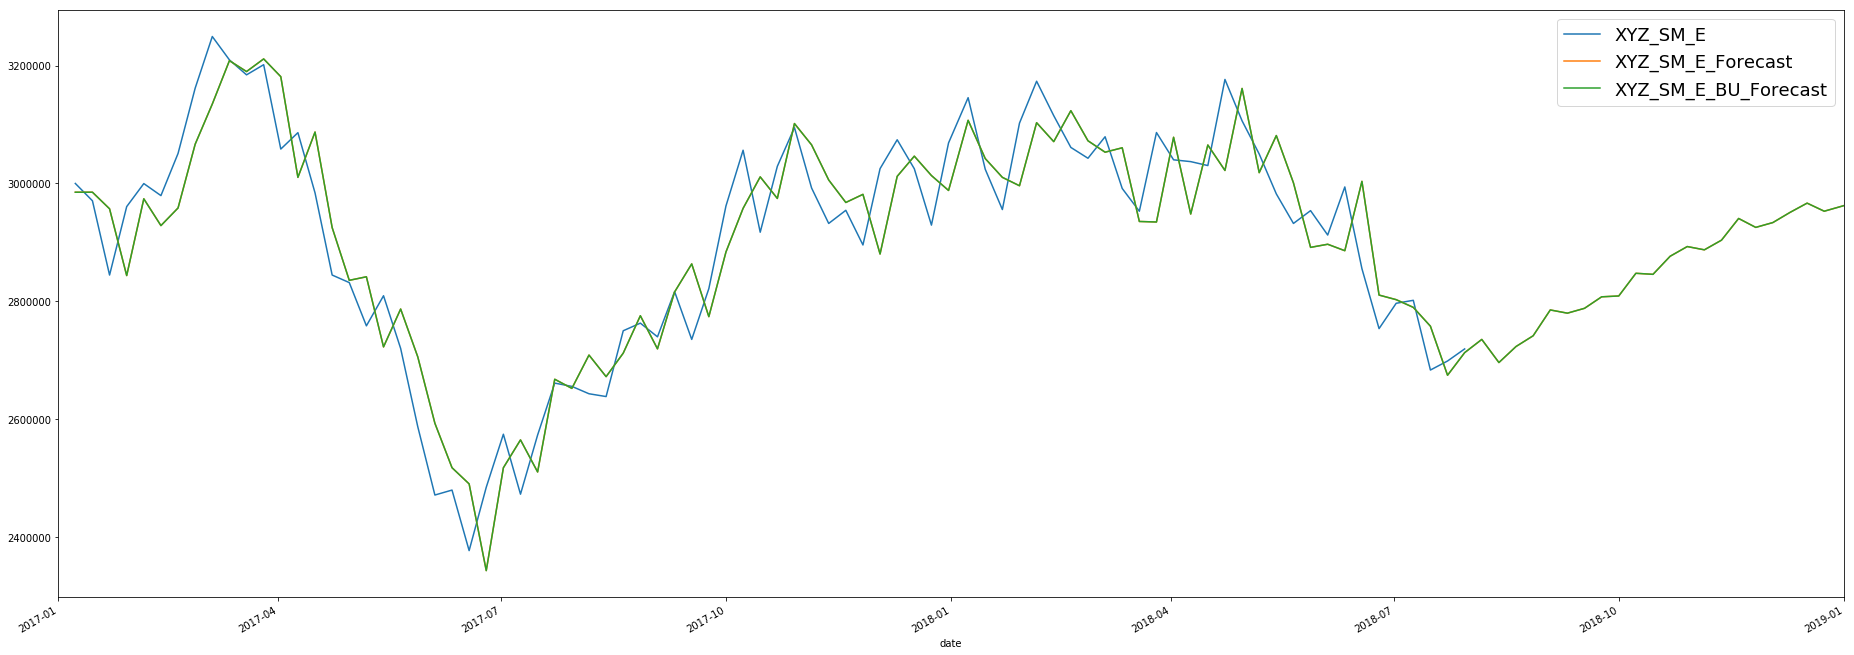

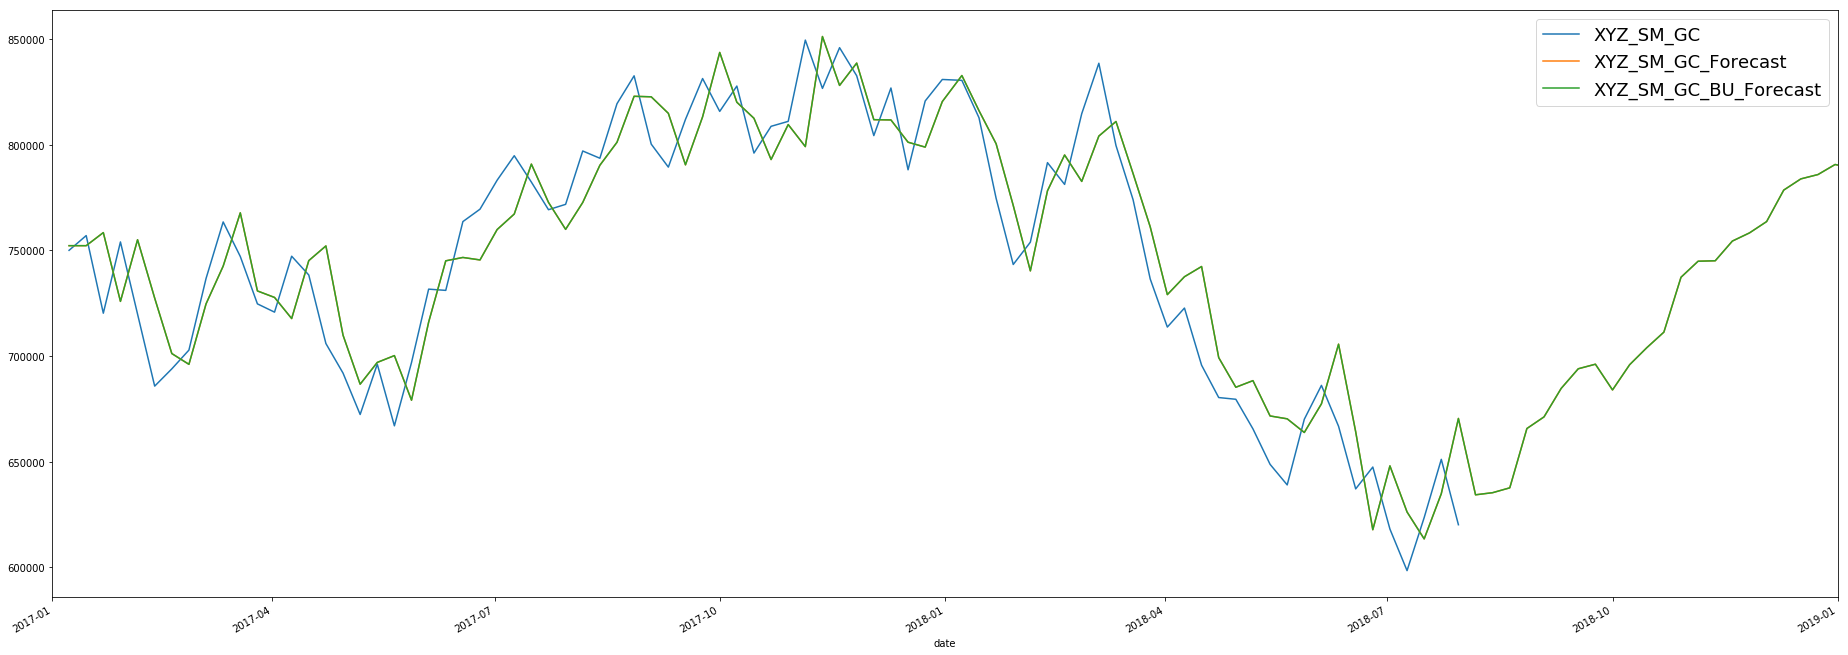

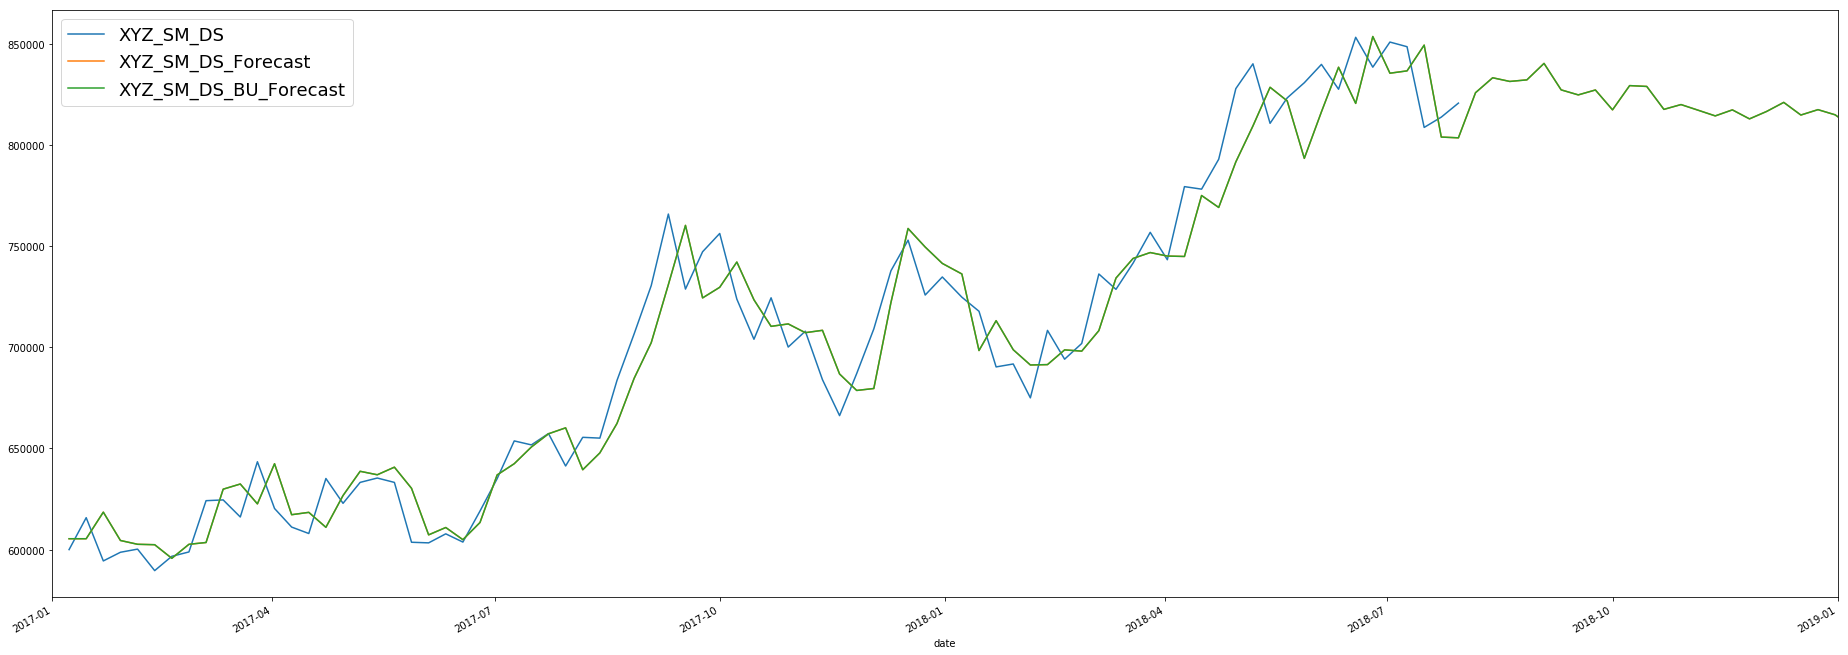

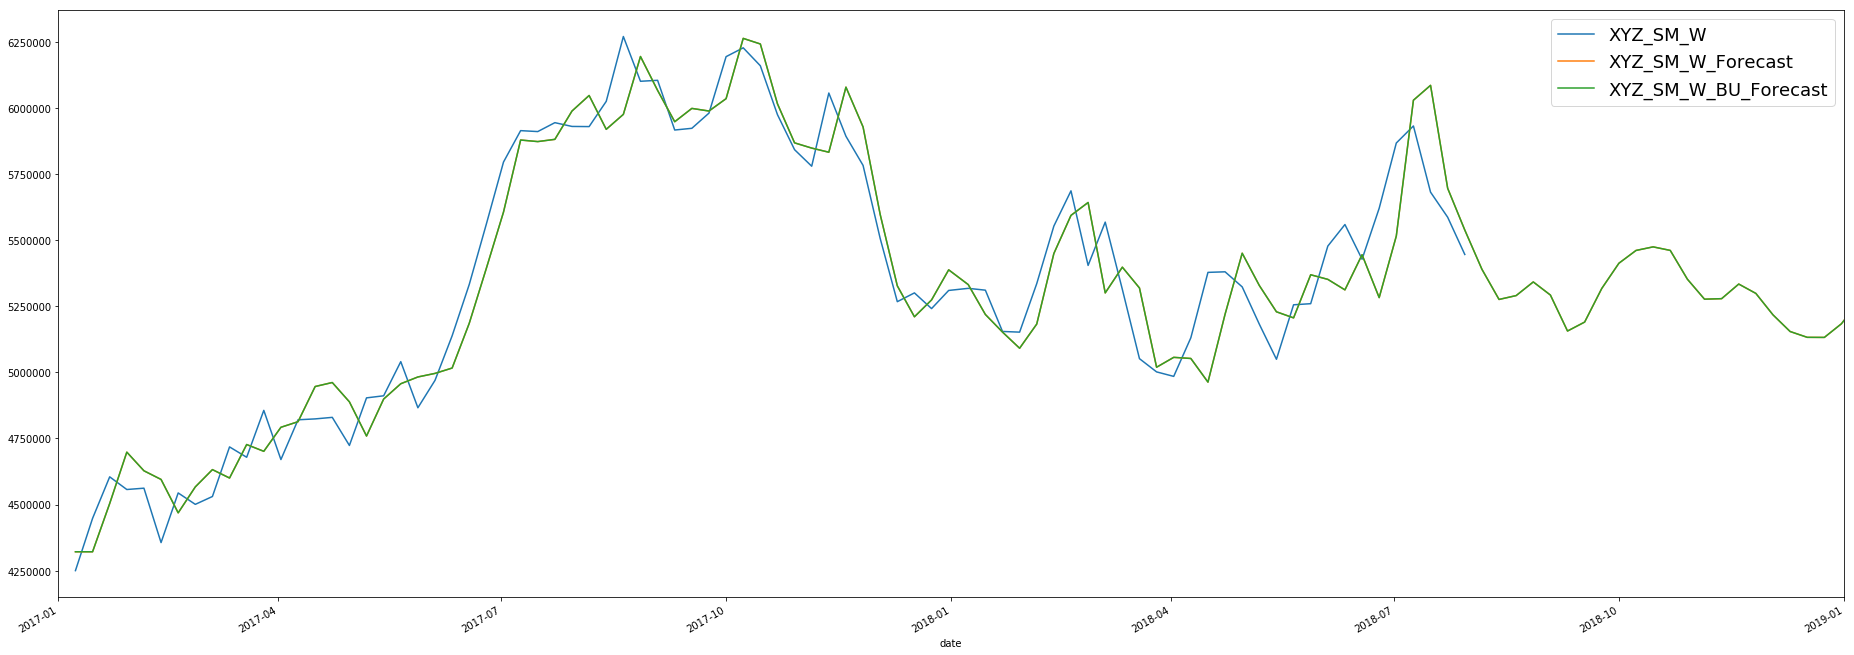

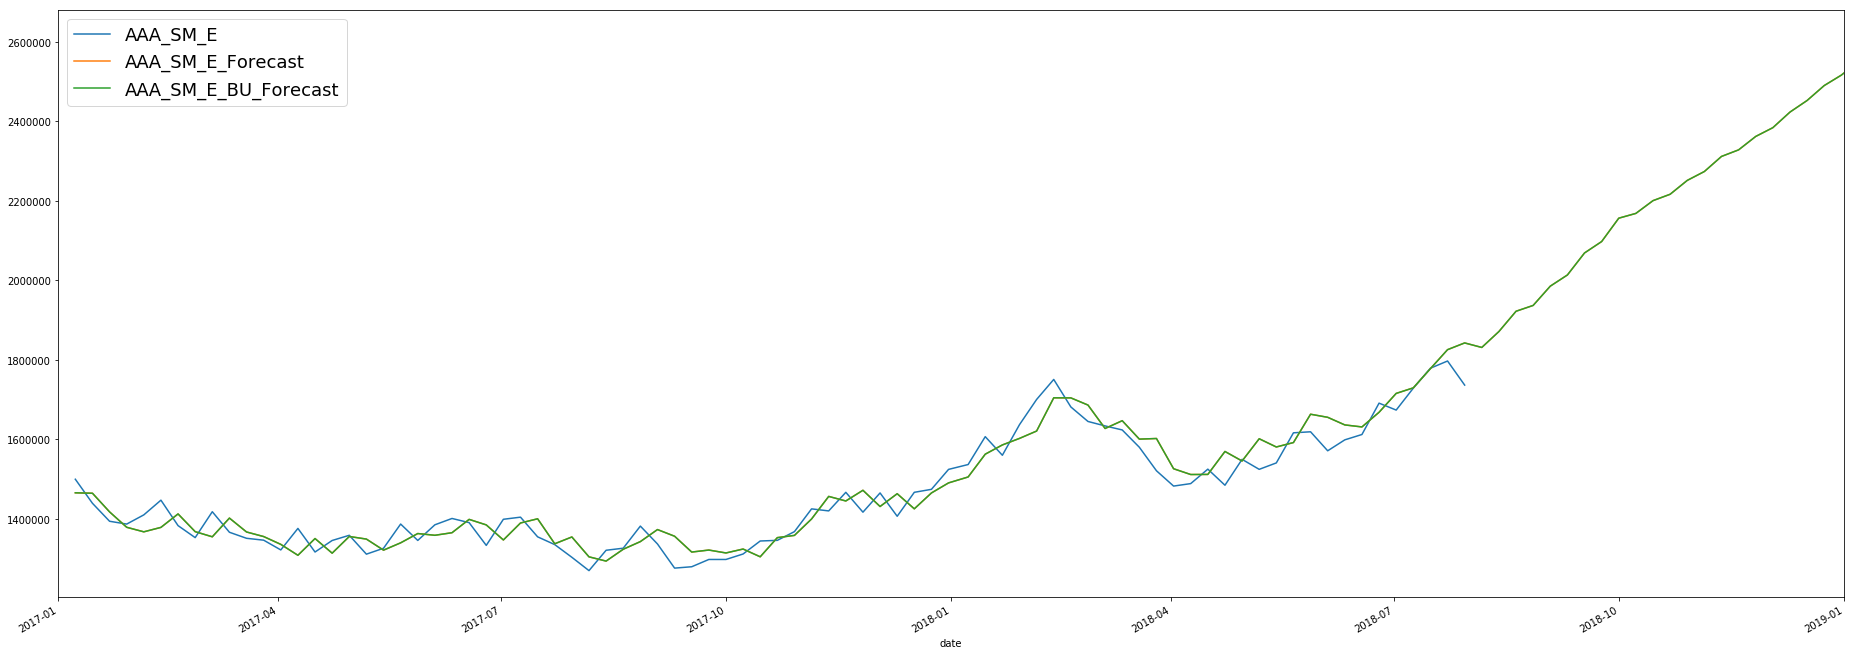

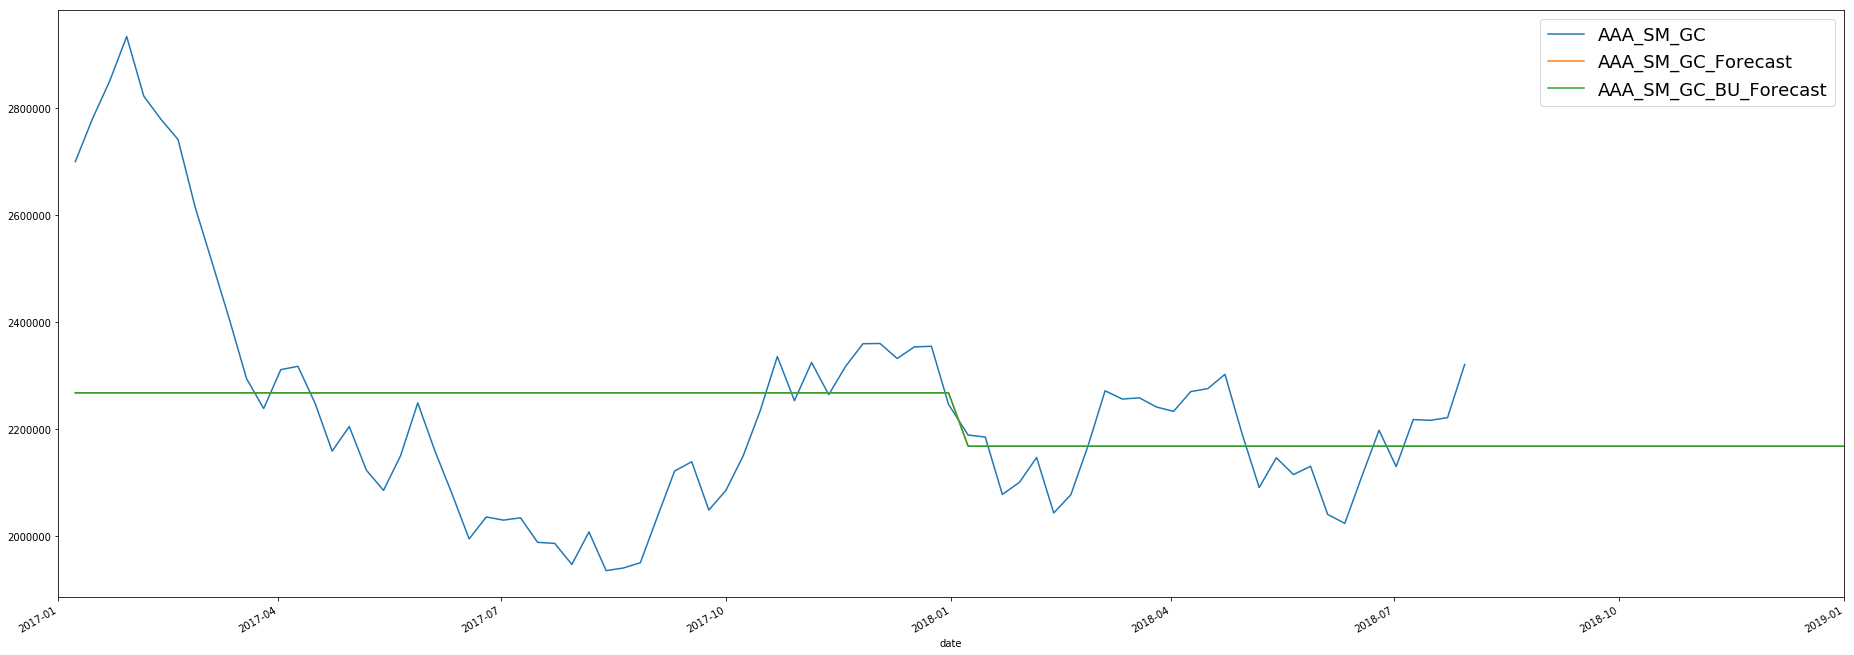

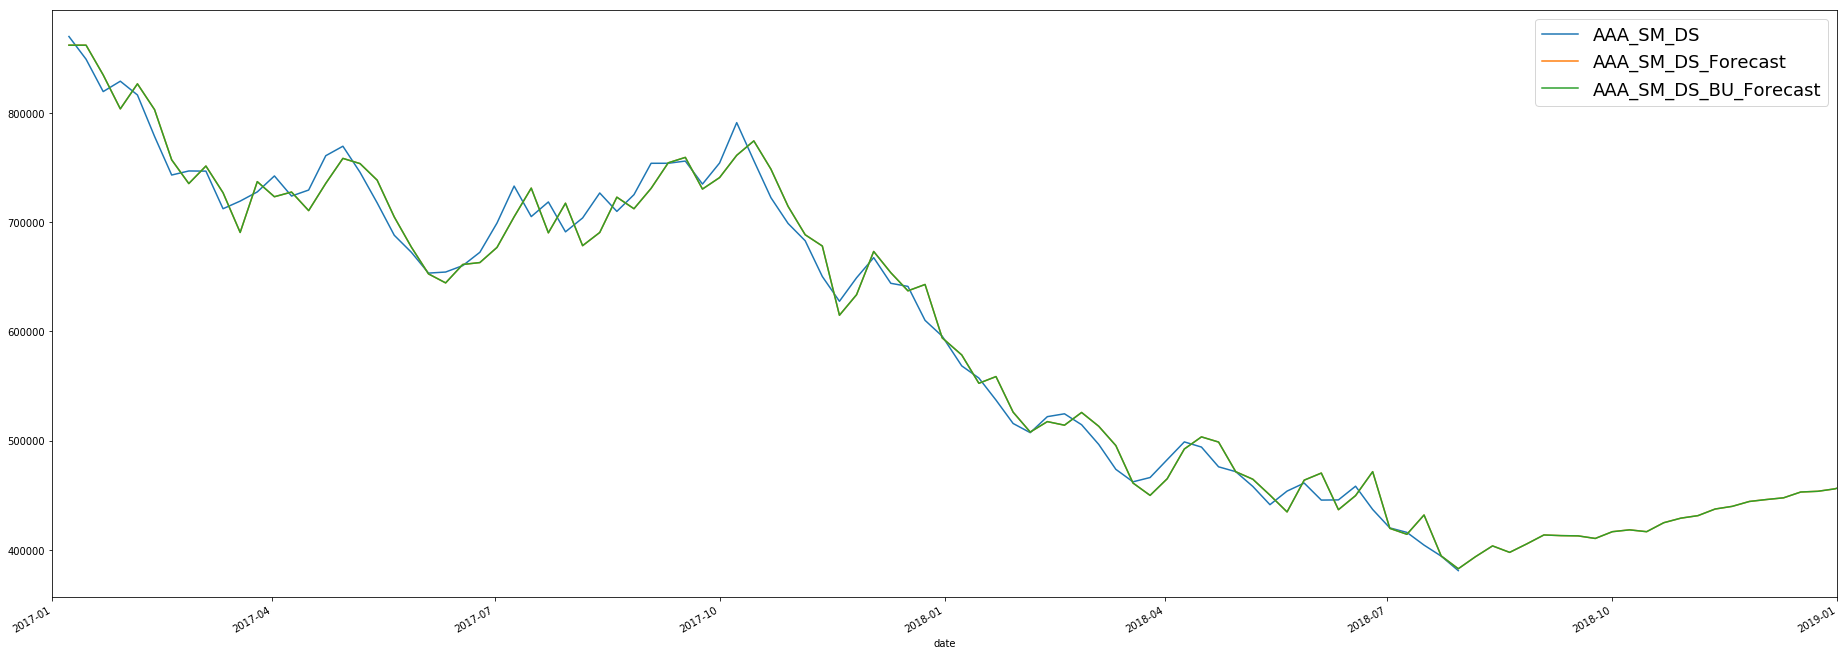

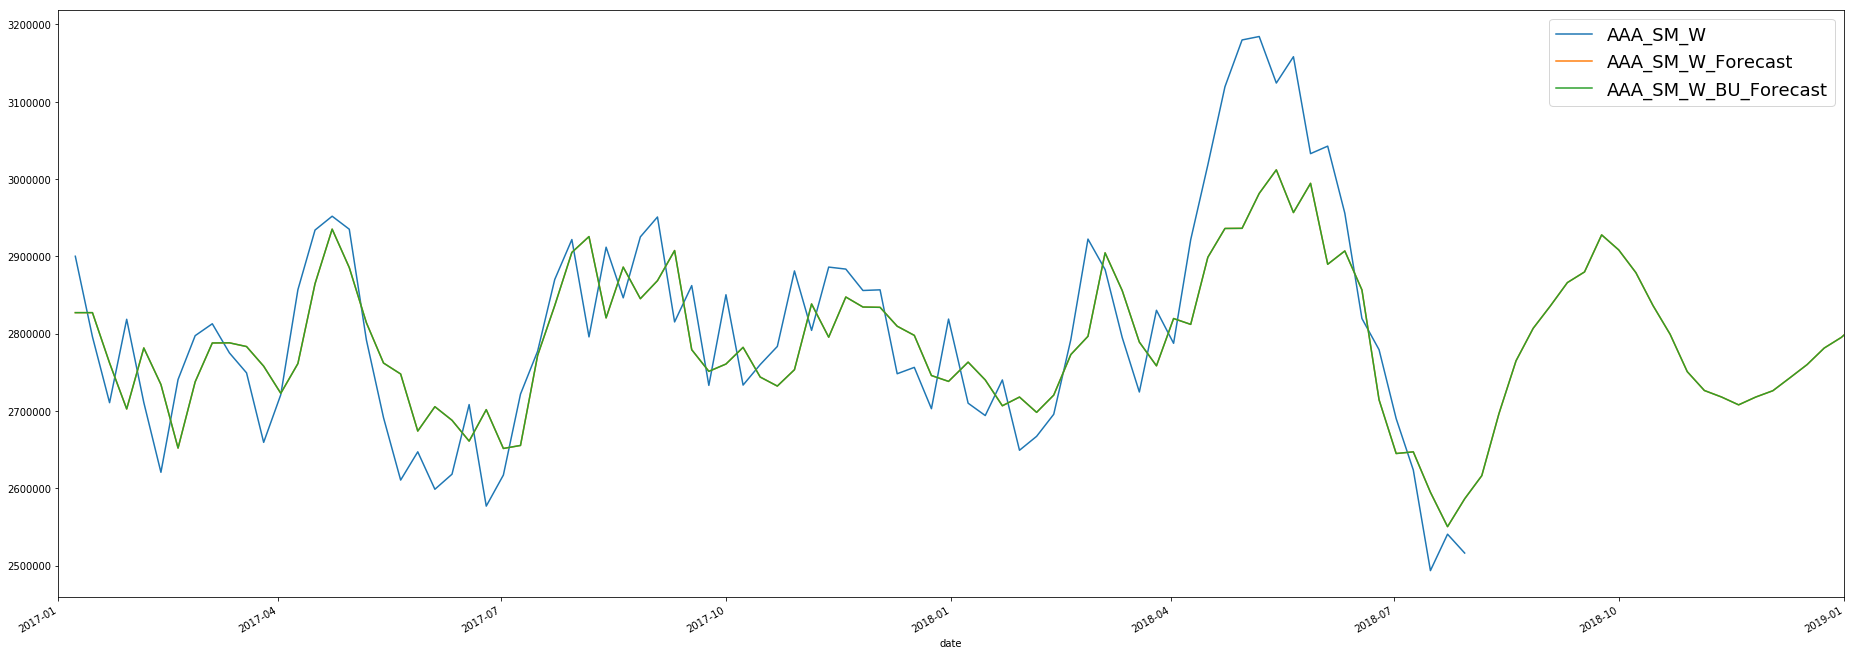

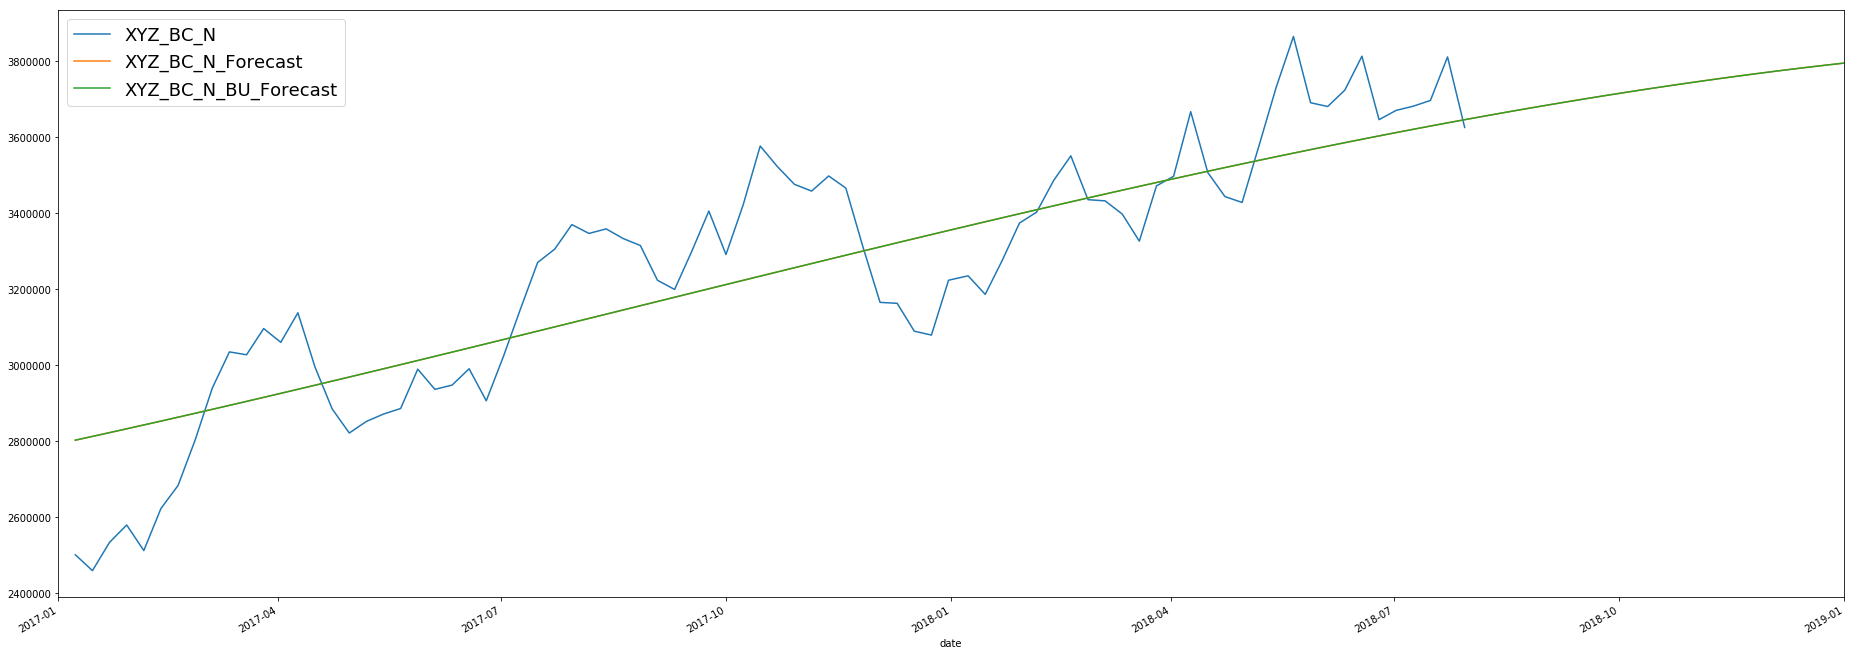

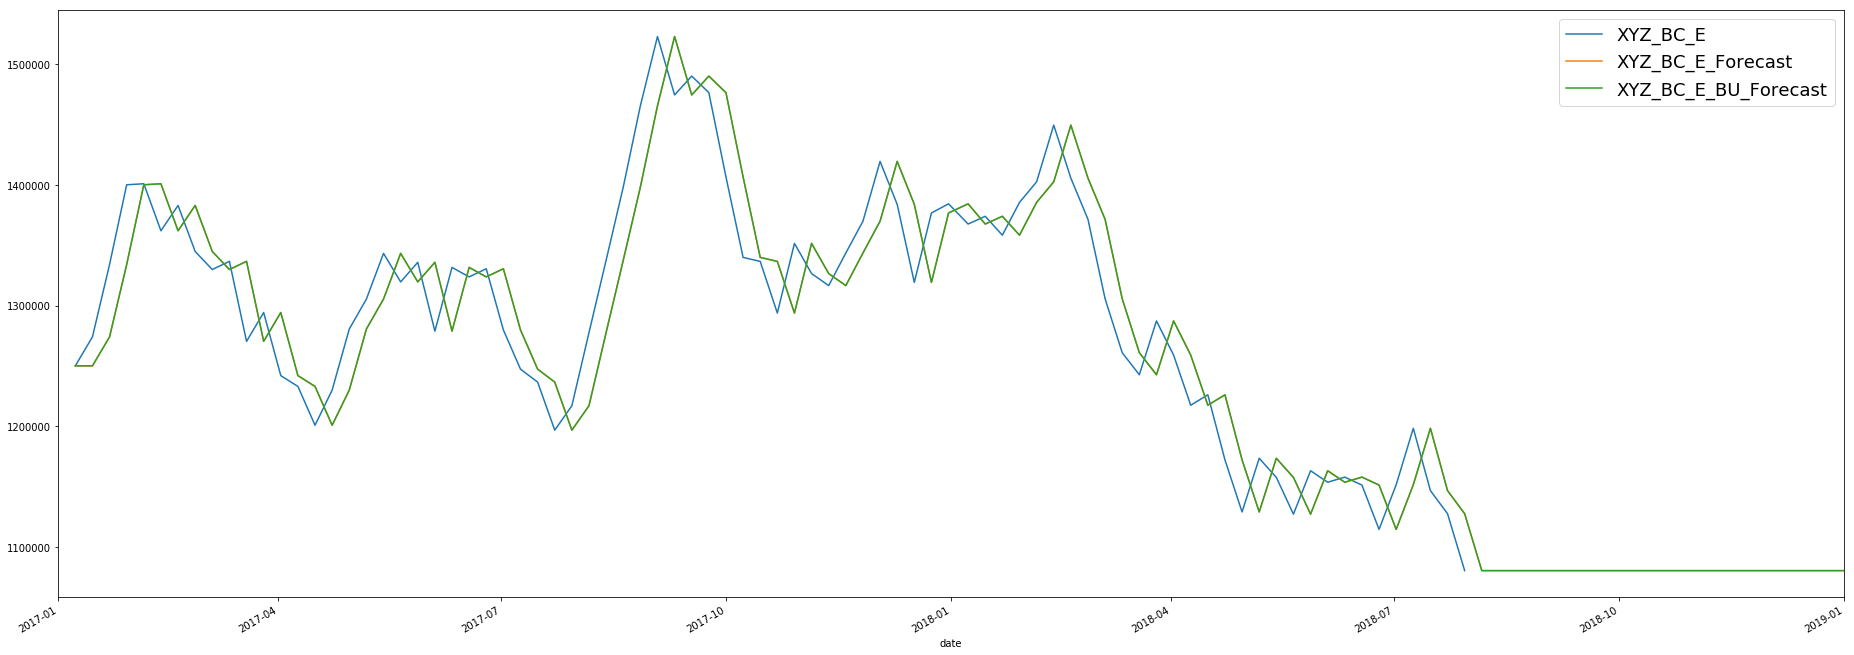

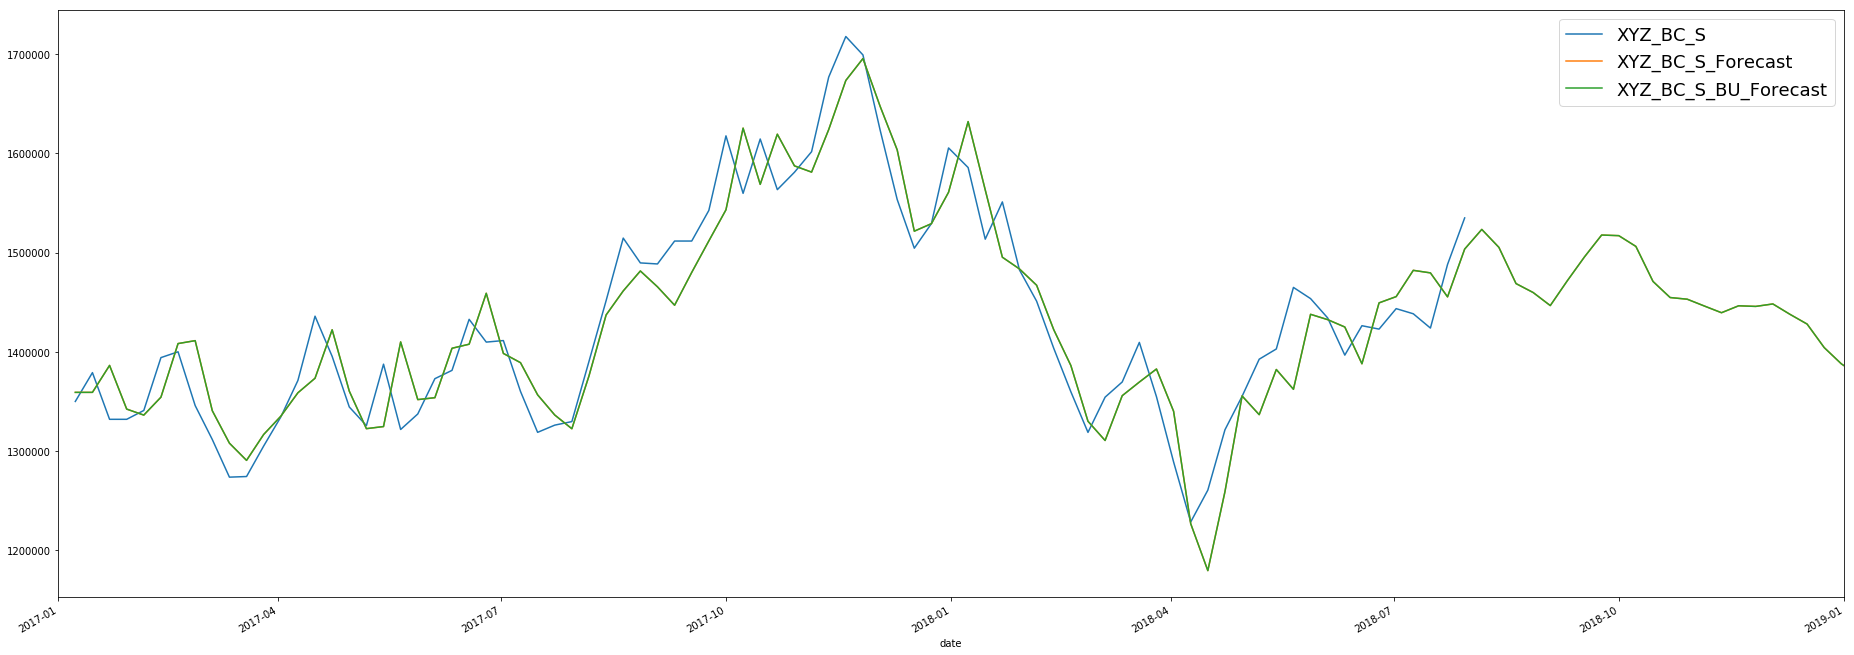

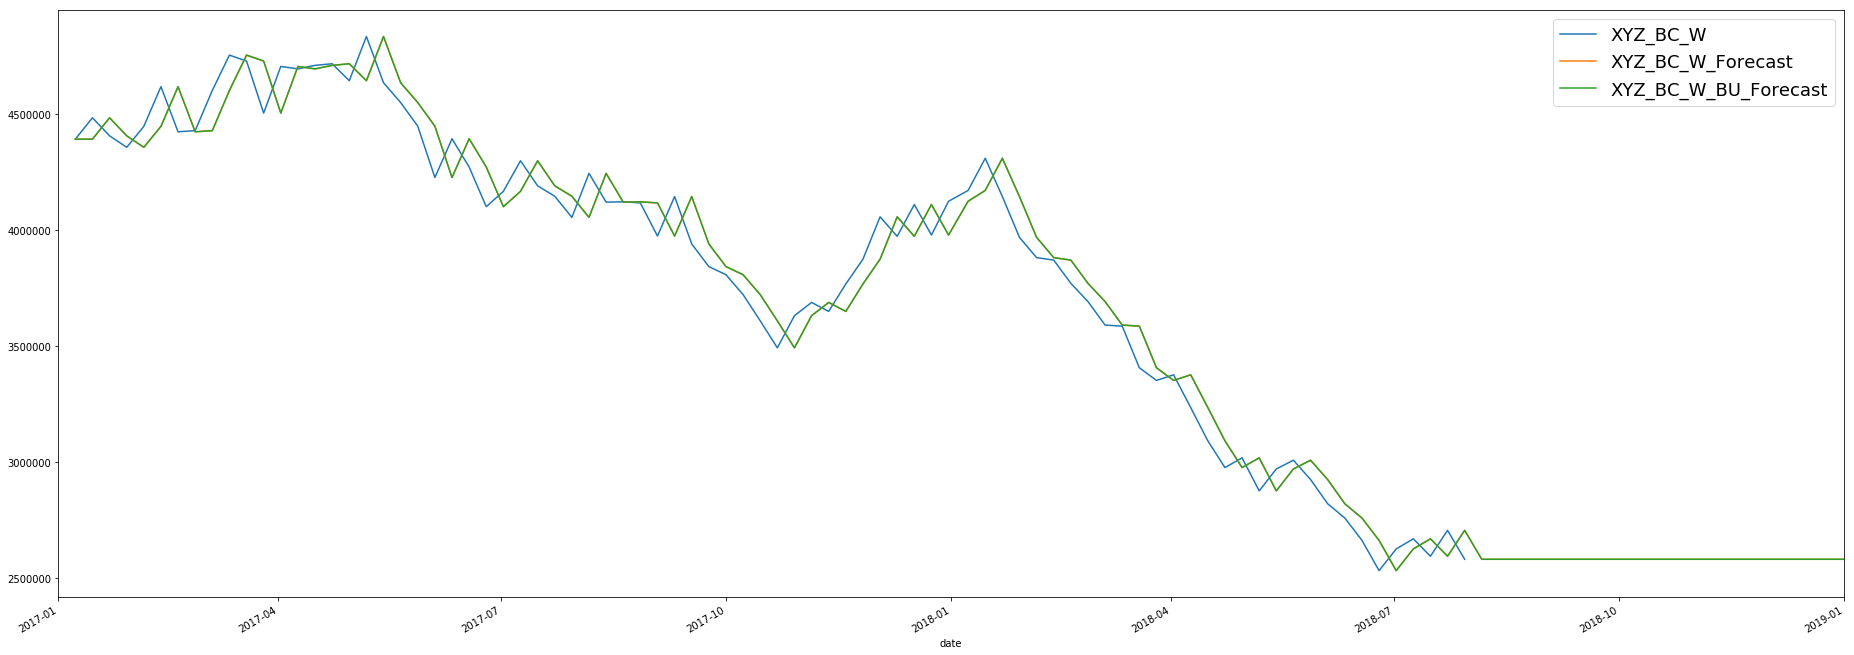

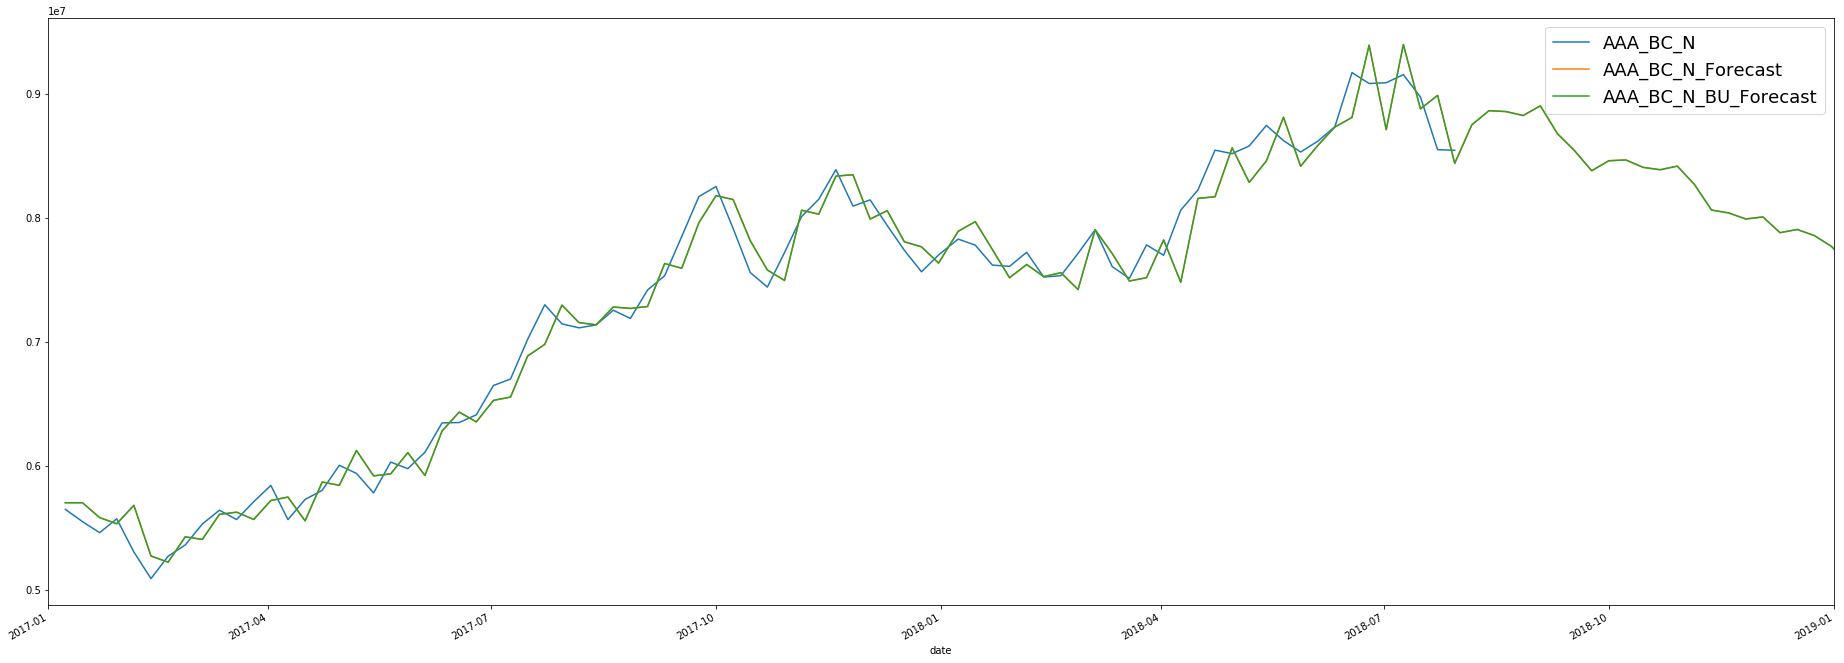

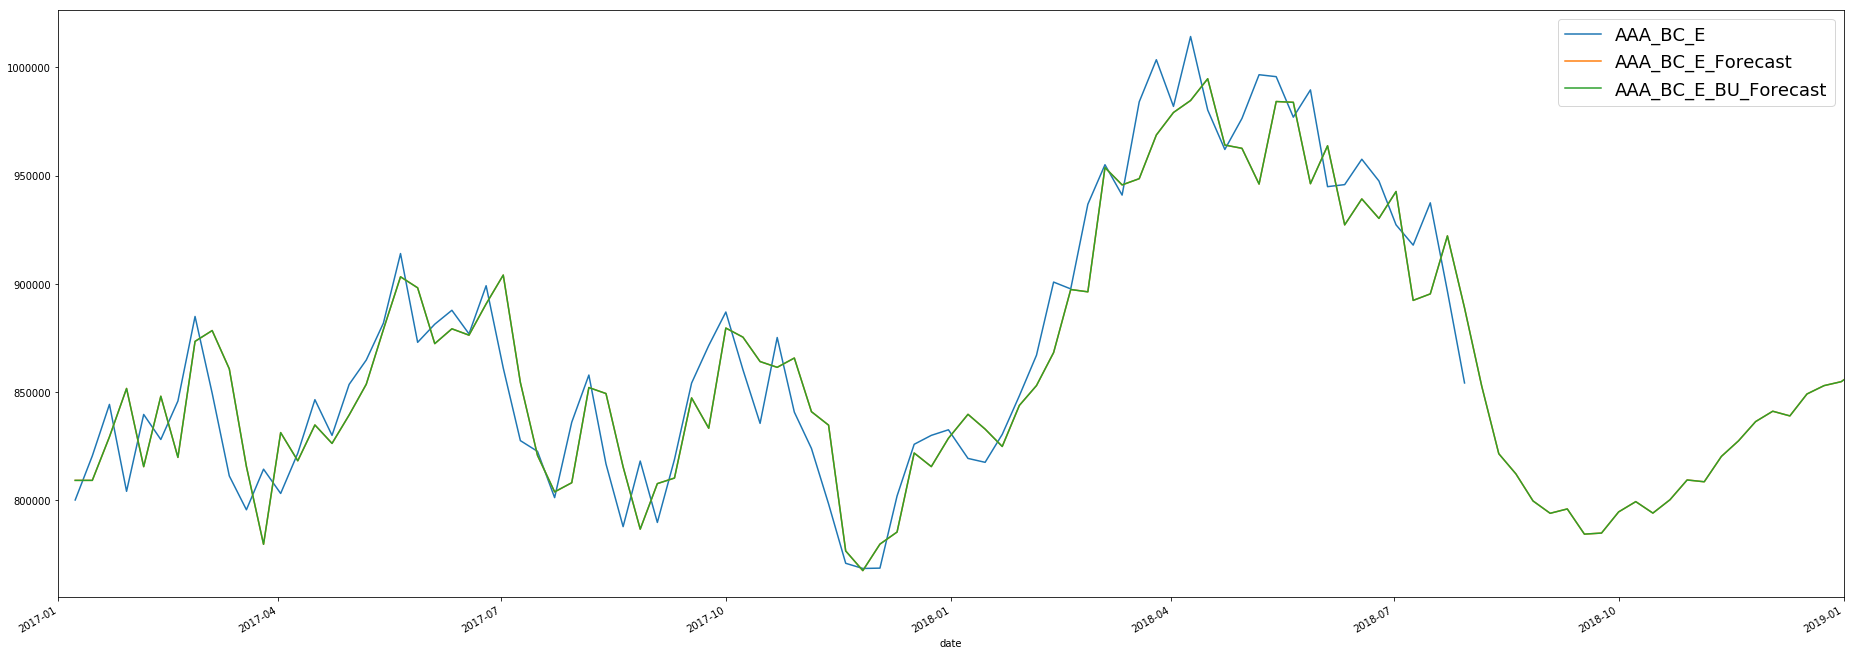

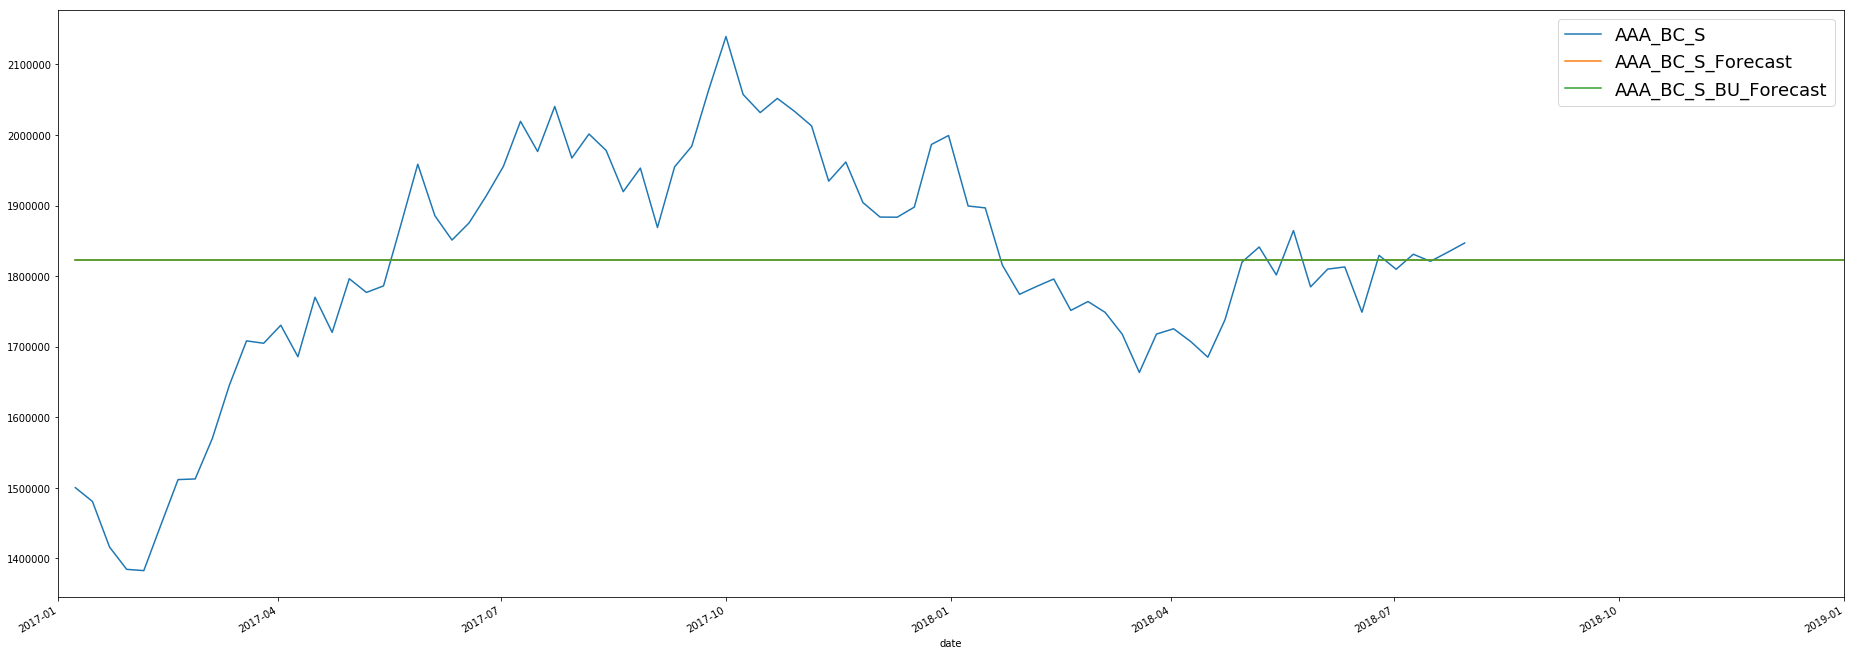

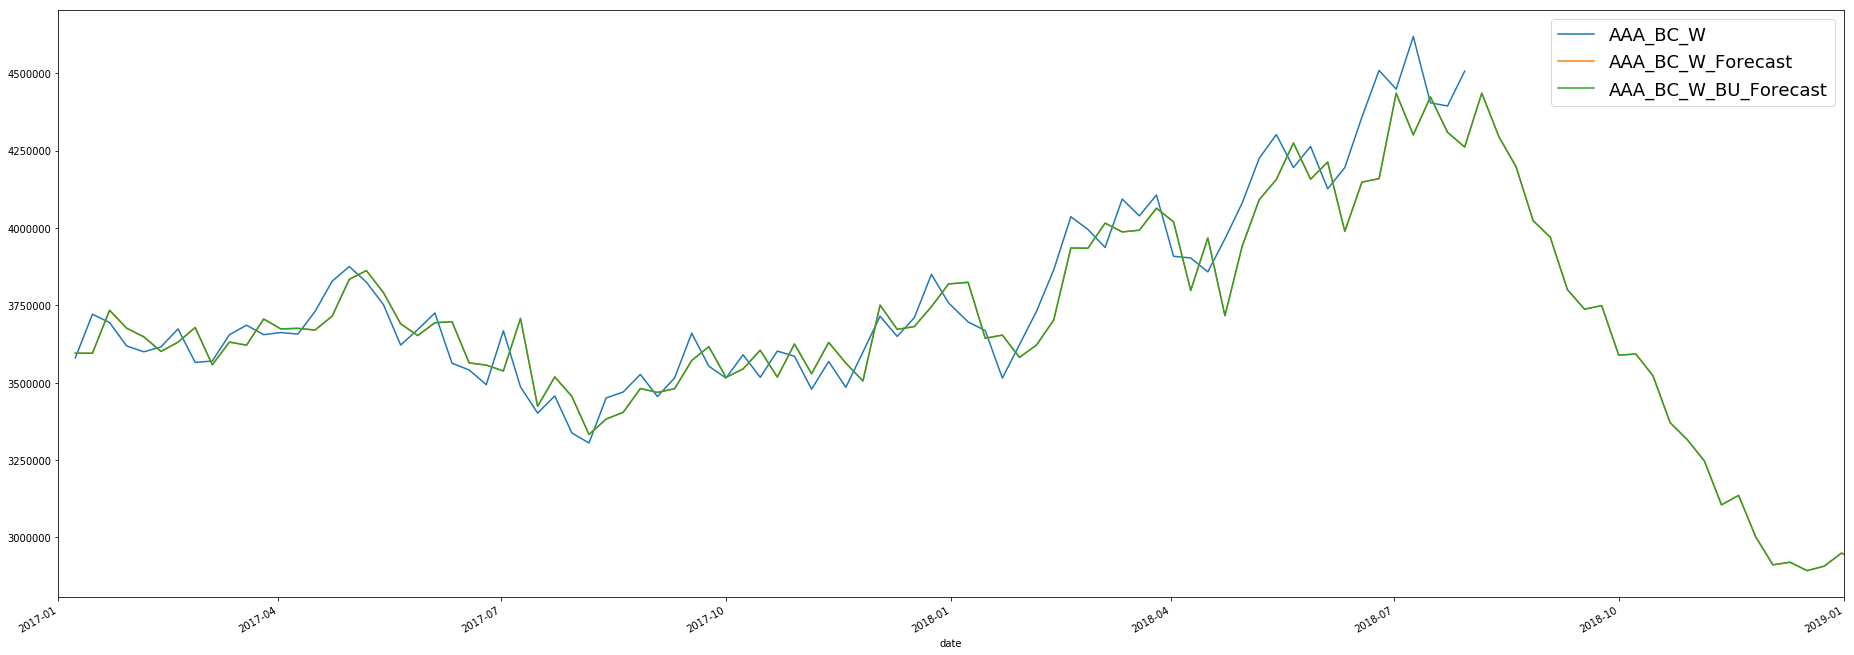

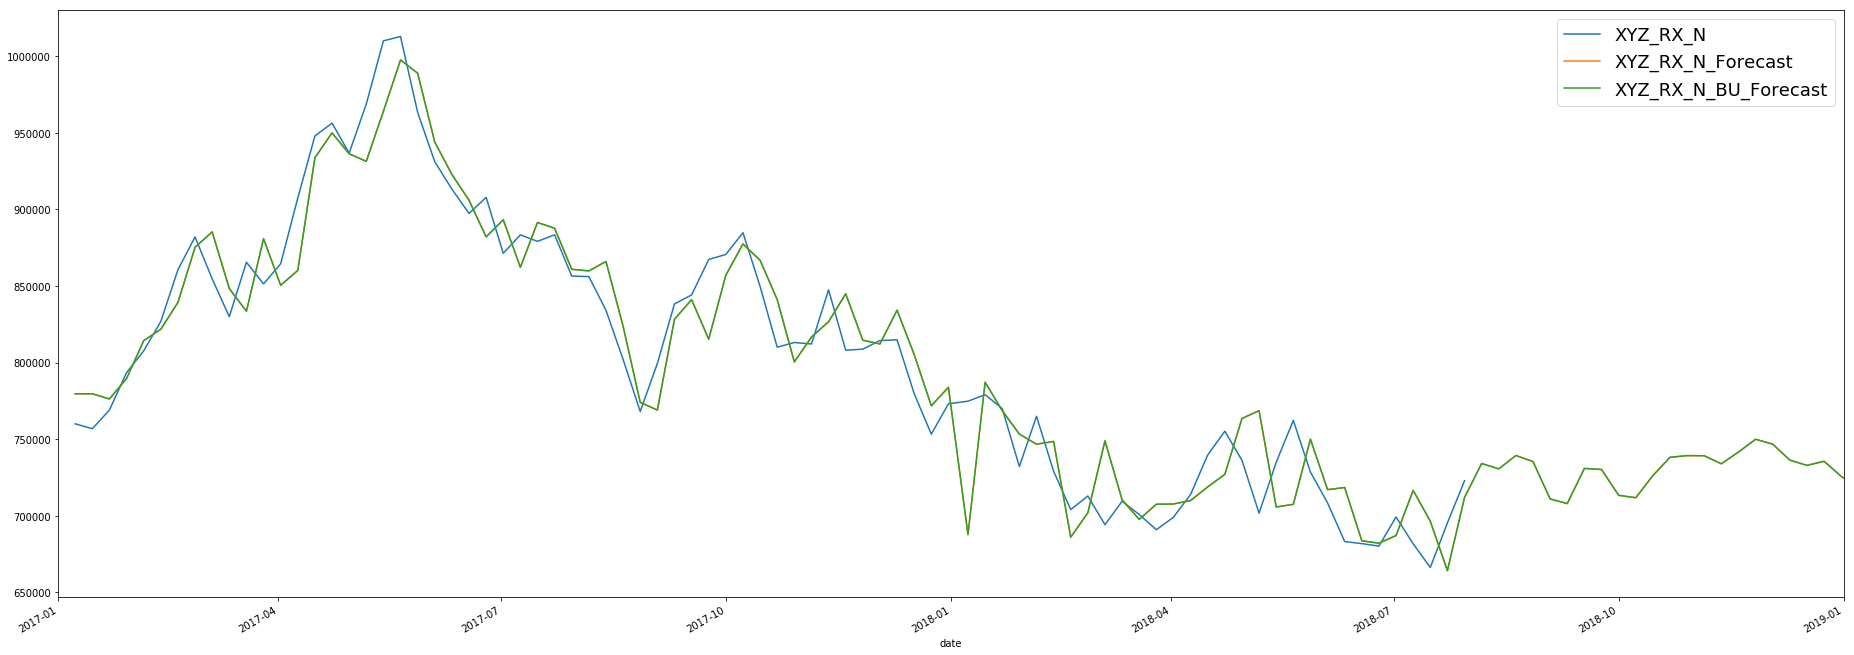

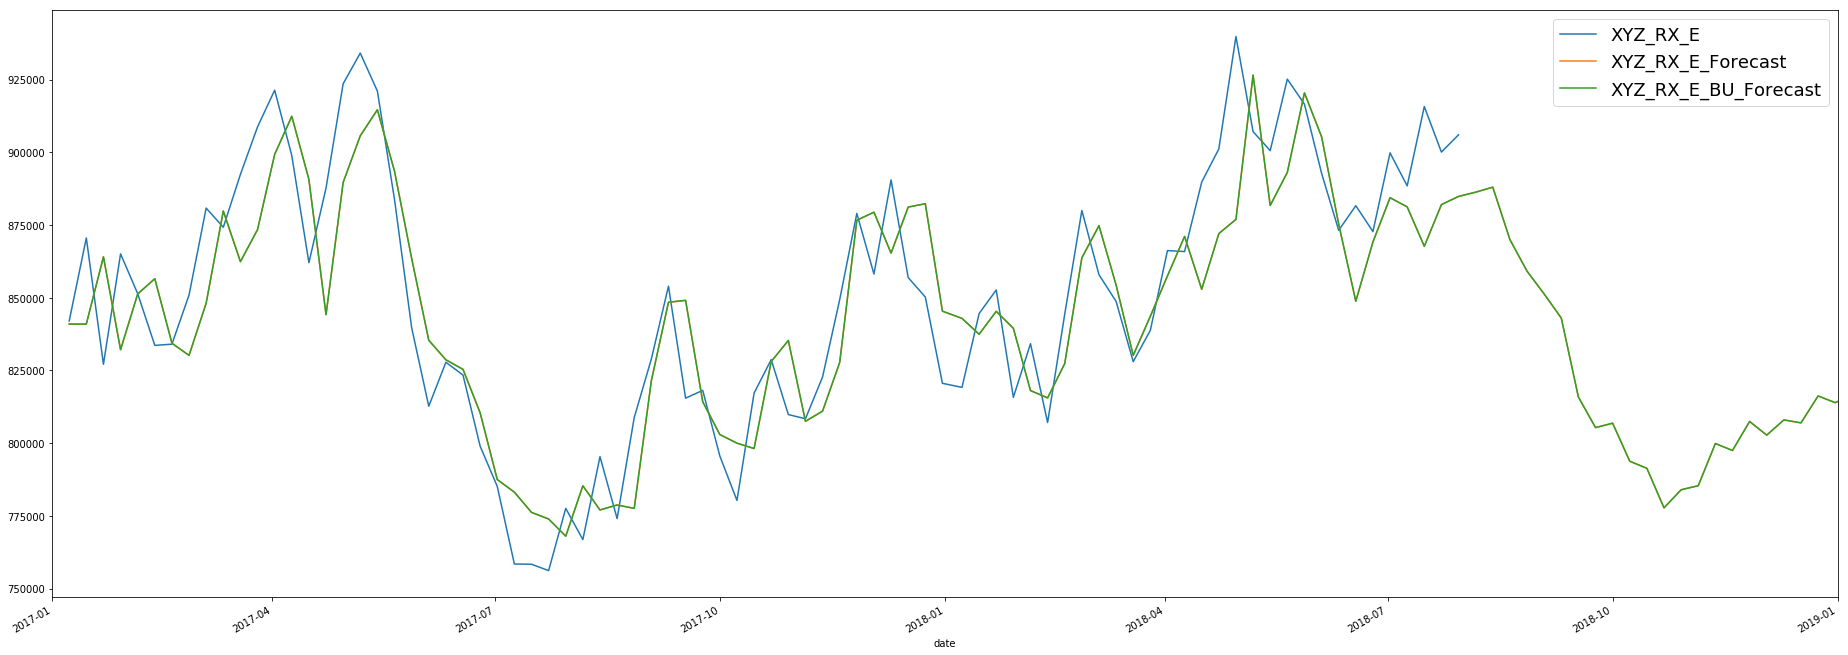

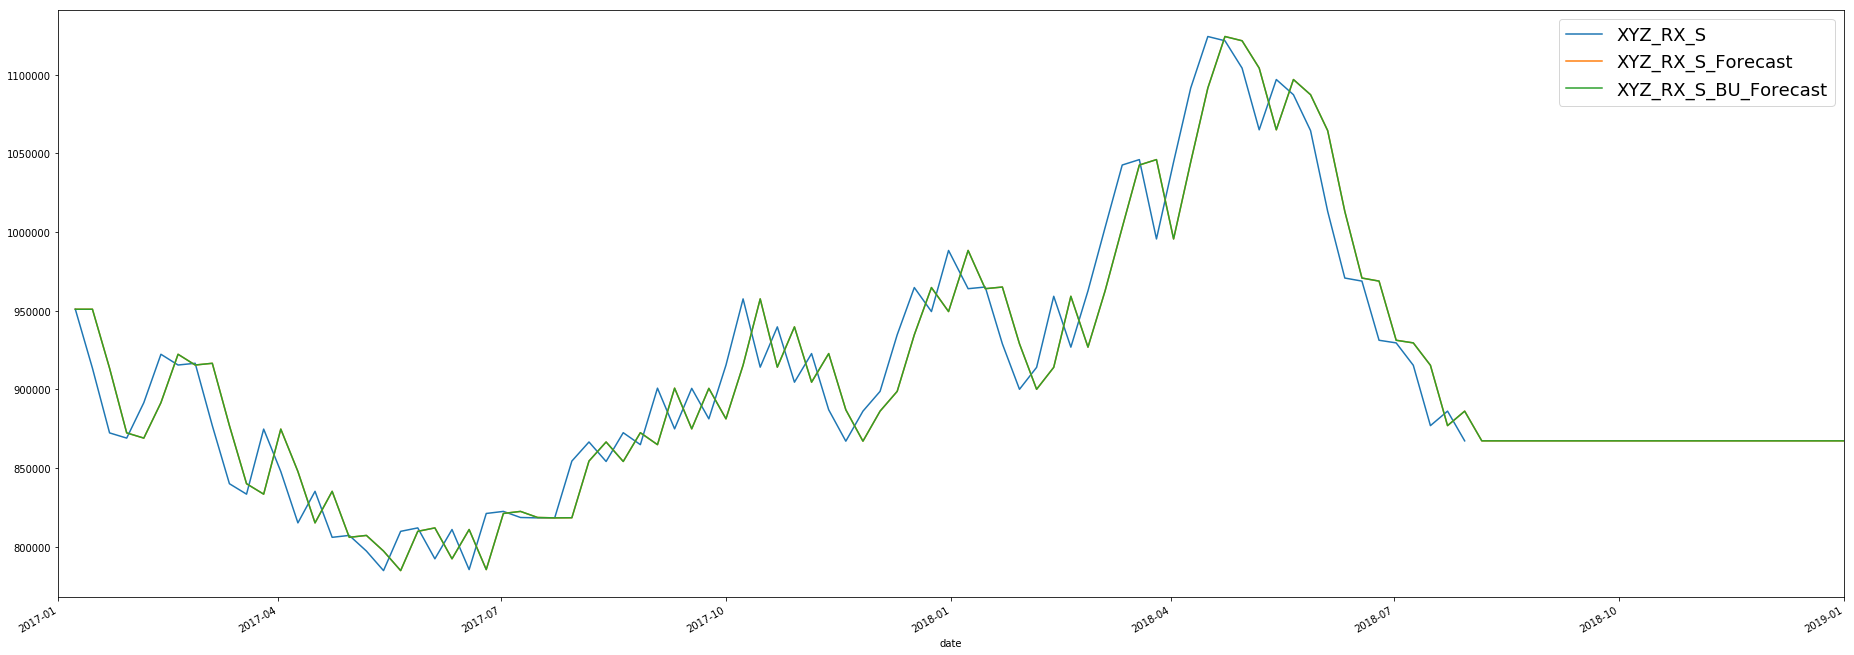

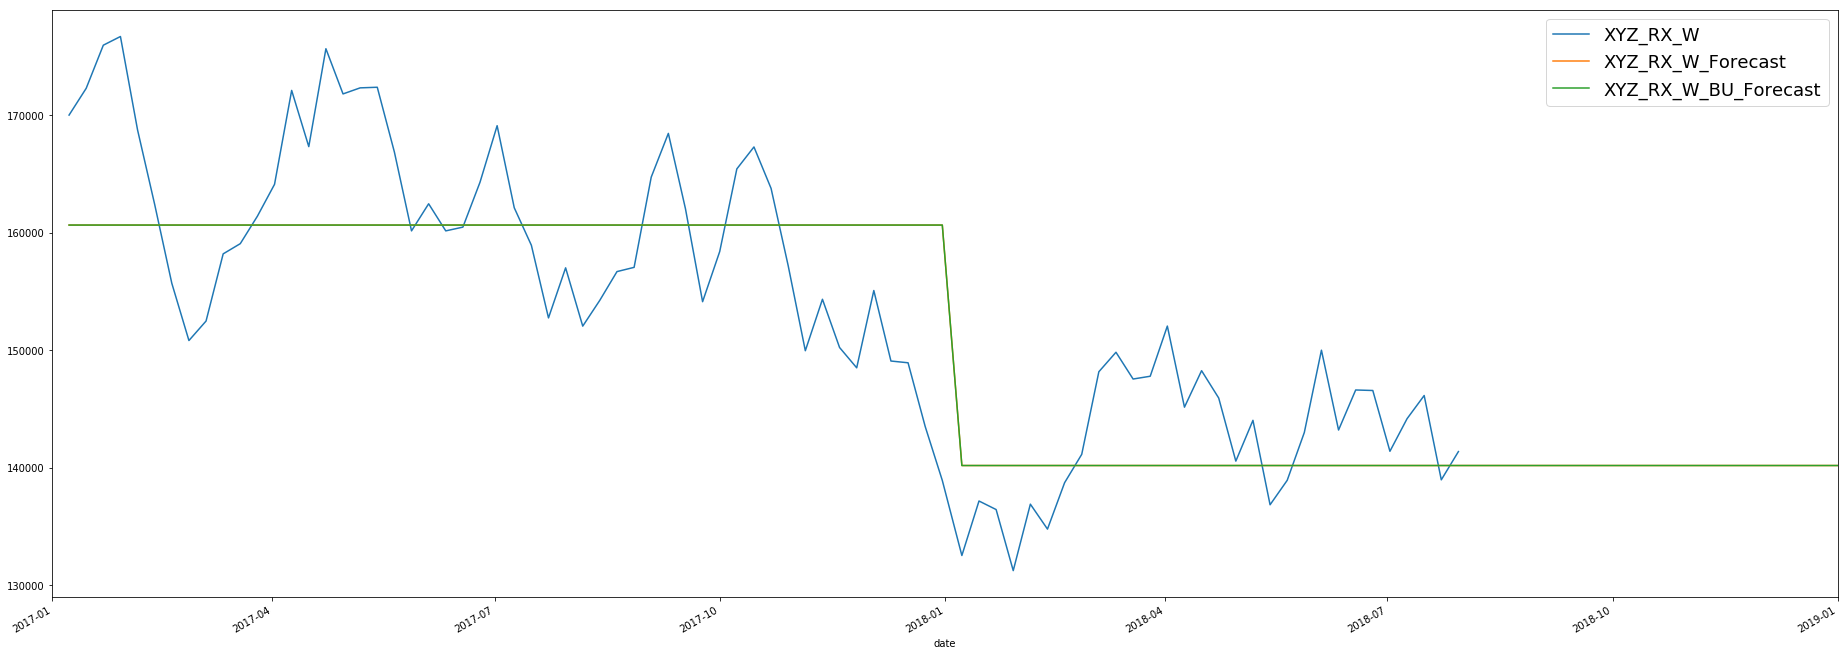

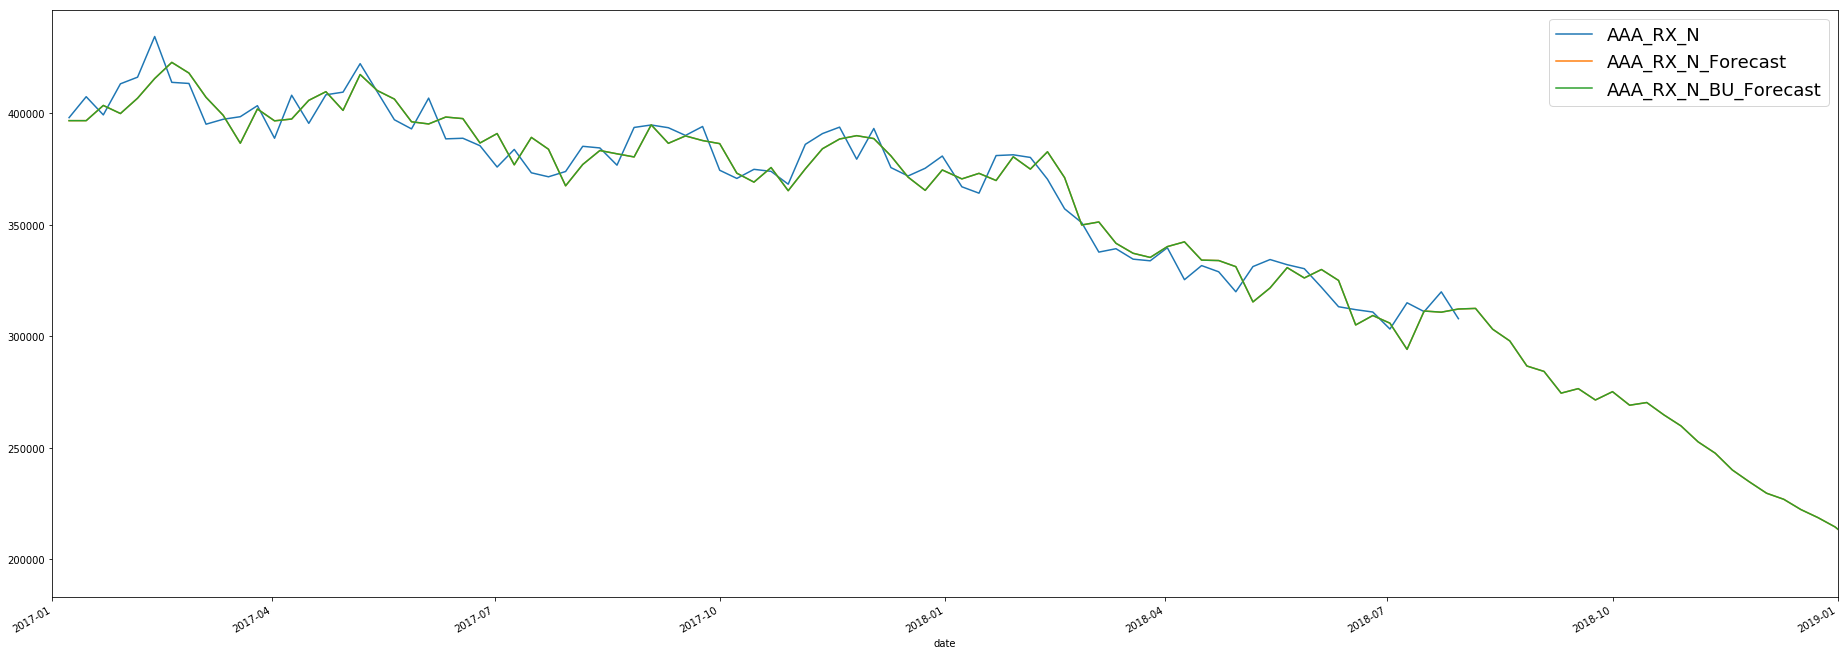

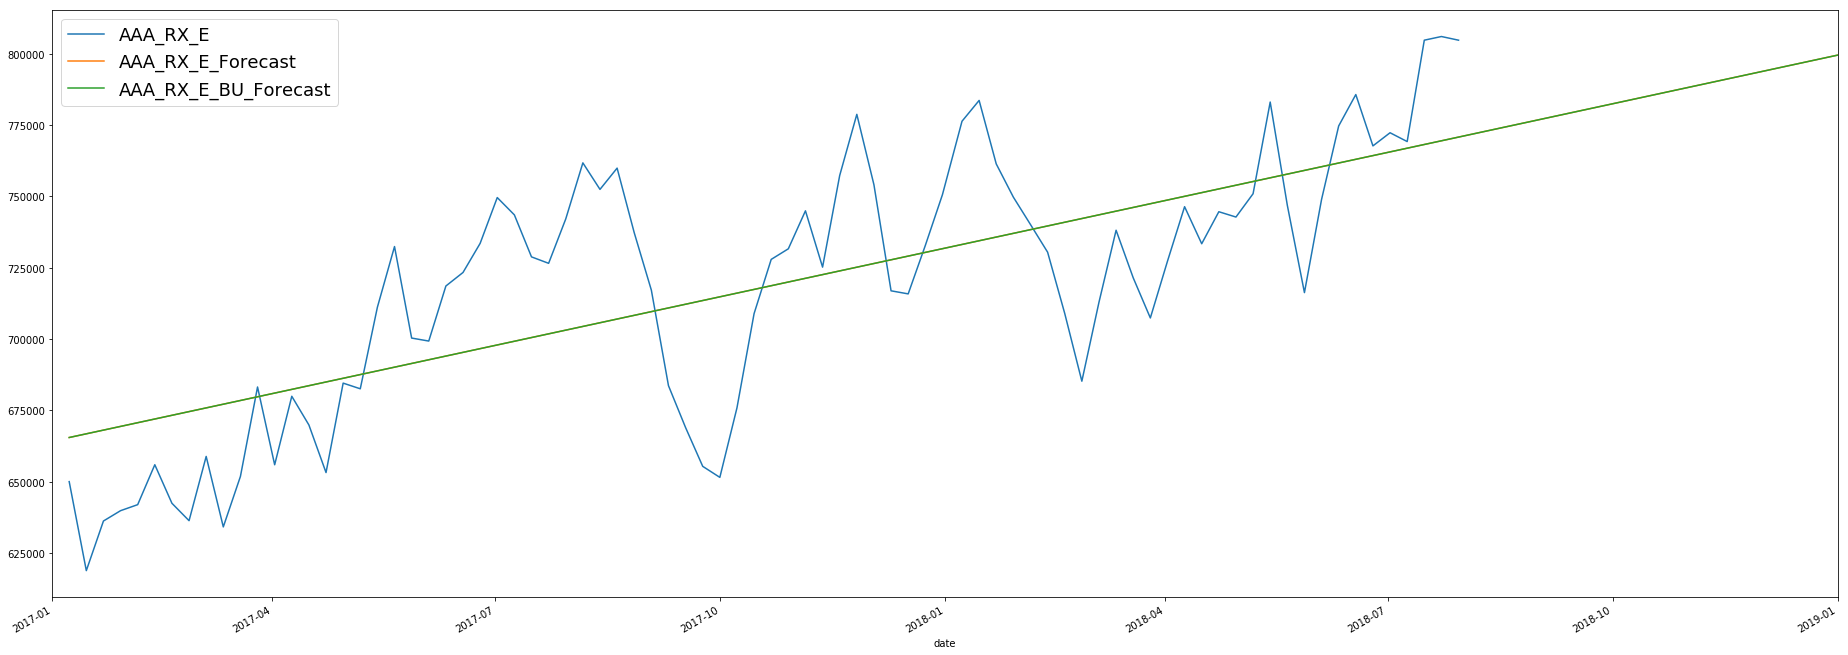

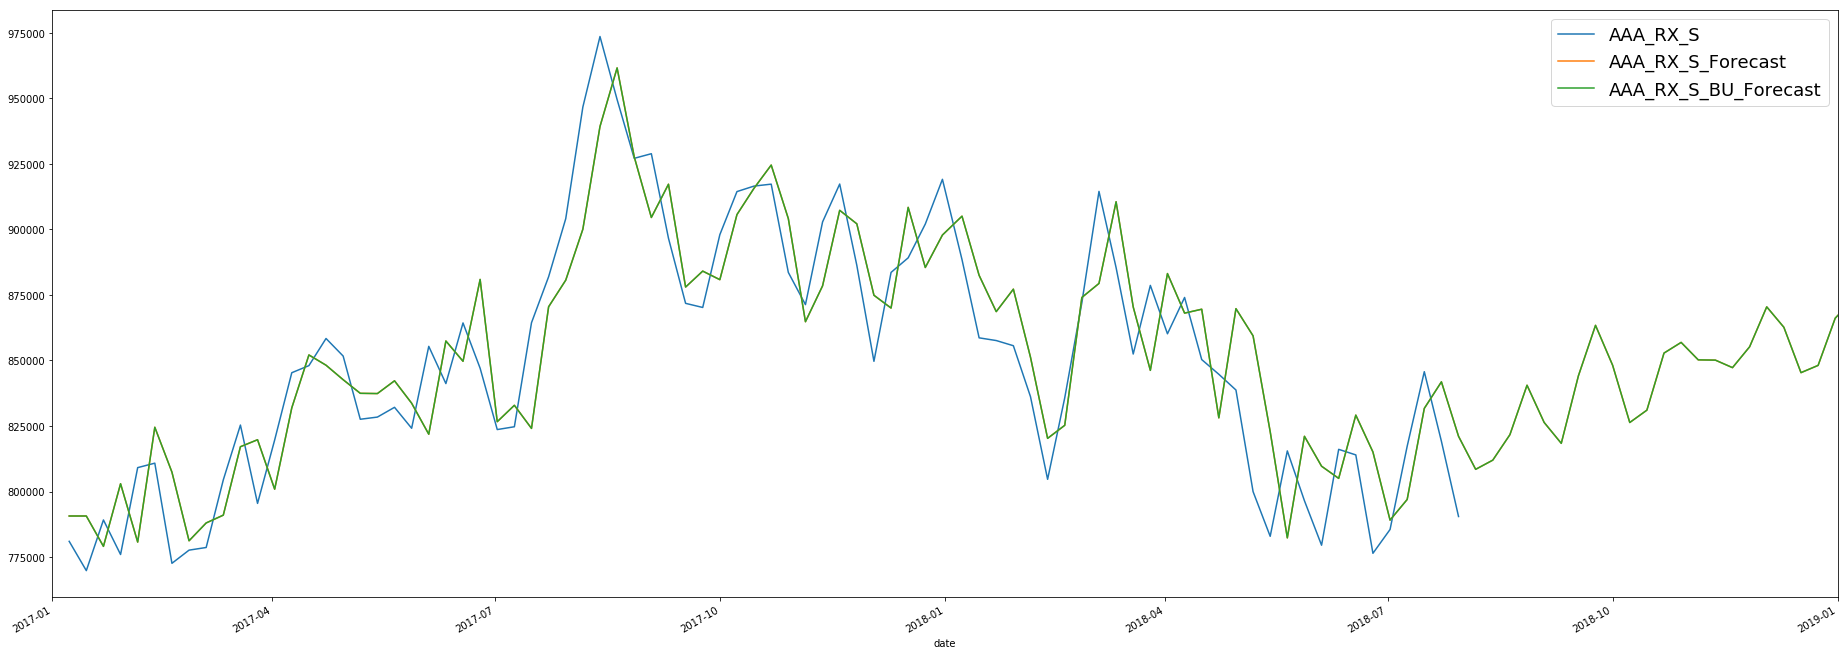

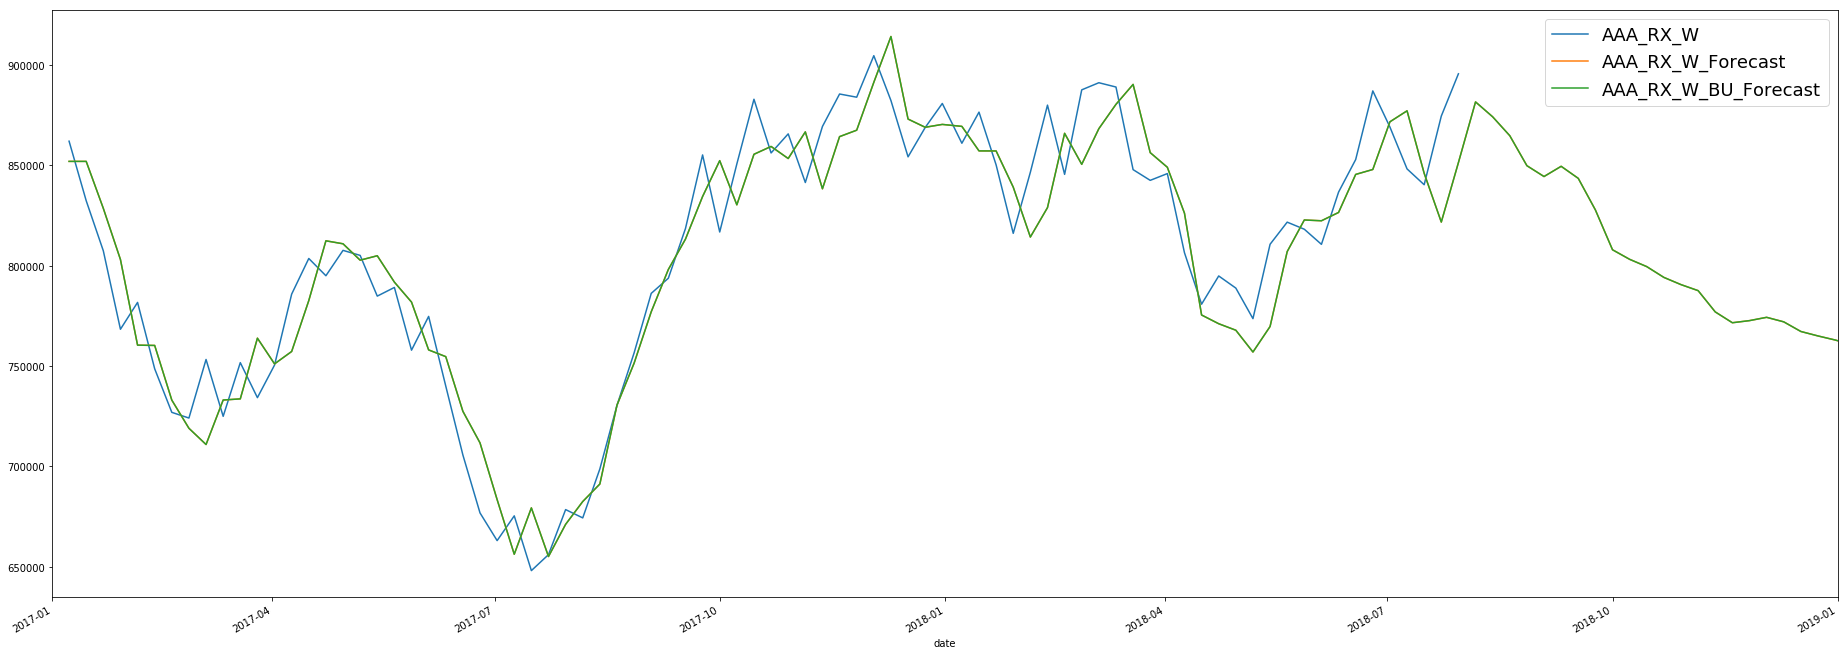

In [23]:
col="XYZ_SM_N XYZ_SM_E XYZ_SM_GC XYZ_SM_DS XYZ_SM_W AAA_SM_E AAA_SM_GC AAA_SM_DS AAA_SM_W XYZ_BC_N XYZ_BC_E XYZ_BC_S XYZ_BC_W AAA_BC_N AAA_BC_E AAA_BC_S AAA_BC_W XYZ_RX_N XYZ_RX_E XYZ_RX_S XYZ_RX_W AAA_RX_N AAA_RX_E AAA_RX_S AAA_RX_W".split()
for up in col:
    dfapp_out.plot('date' , 
                    [up , up + '_Forecast' , 
                     up + '_BU_Forecast'],
                figsize=(32 , 12),xlim=(datetime.date(2017, 1, 1), datetime.date(2019, 1, 1))).legend(fontsize=18)

### 3.3. Graphs for all Retailers

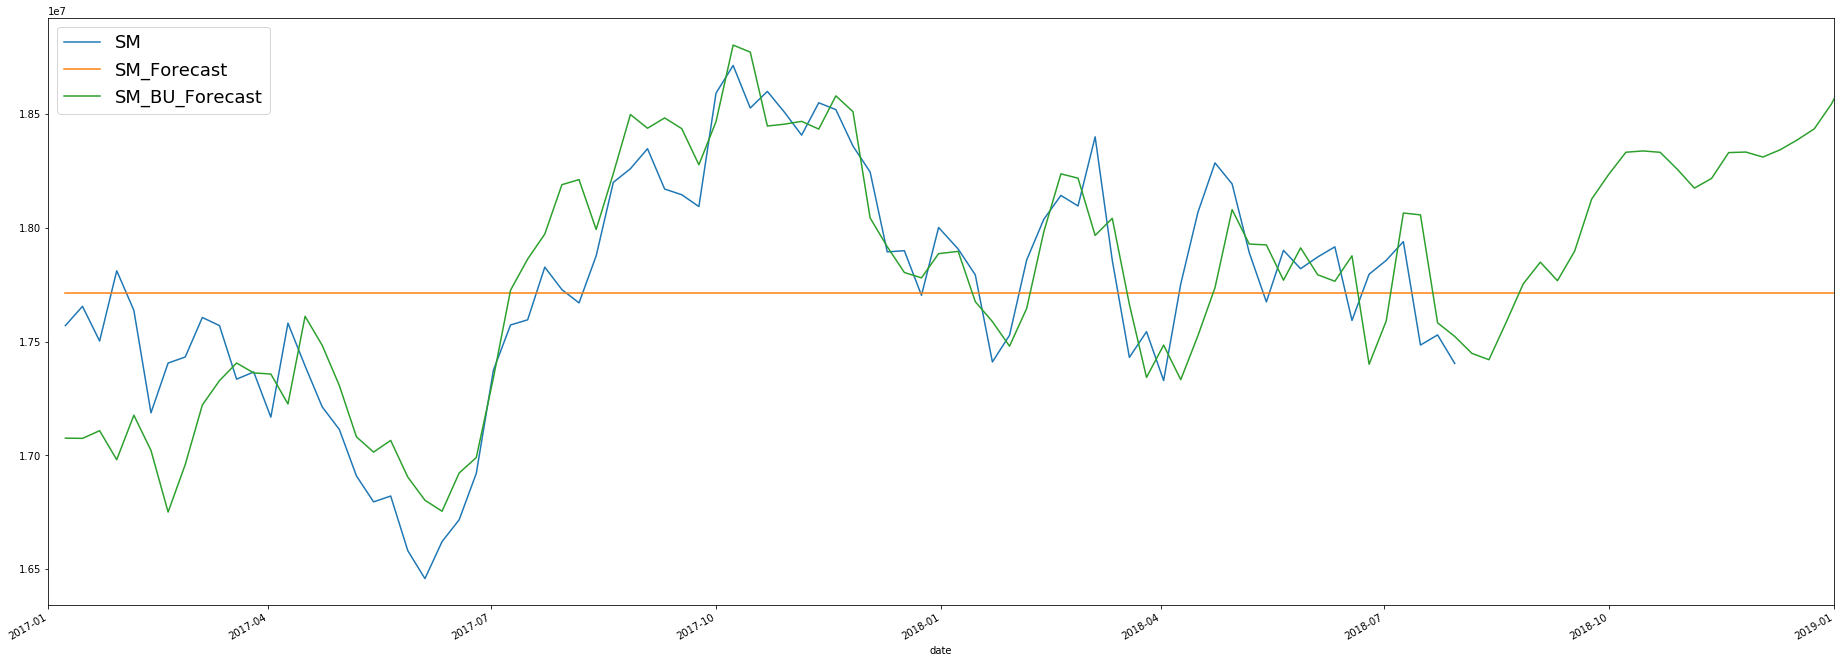

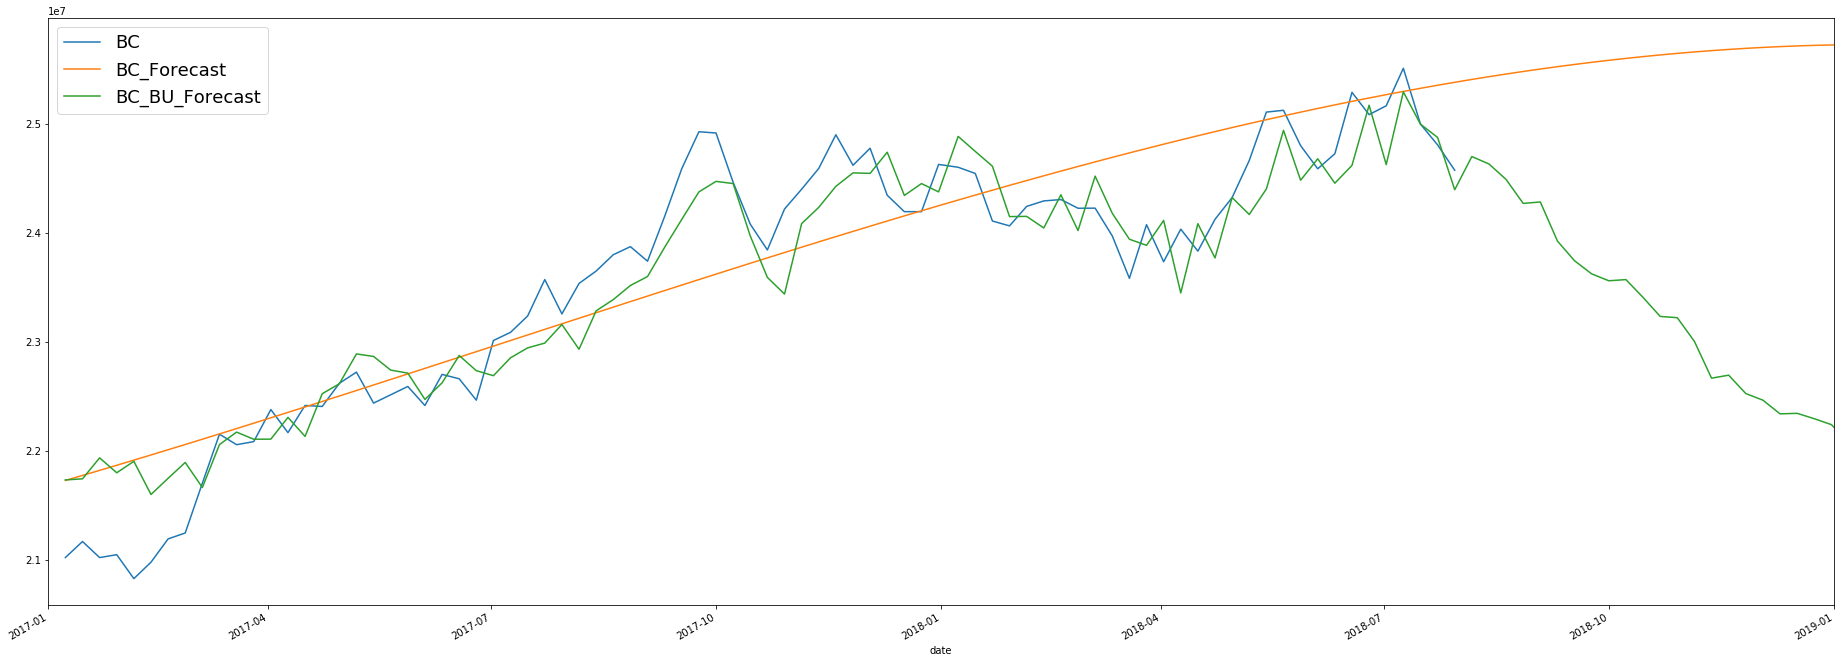

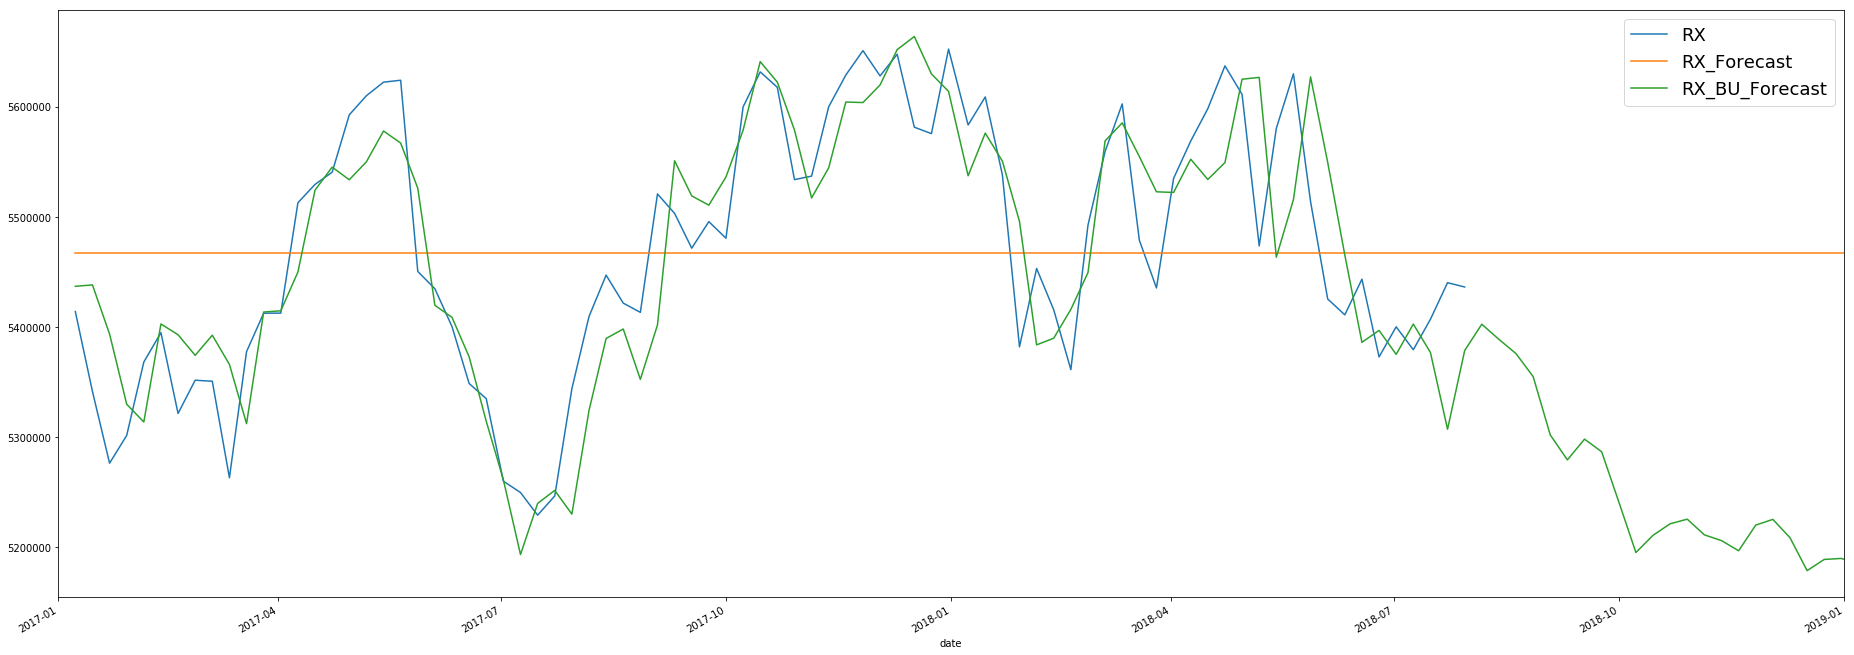

In [24]:
for ret in ['SM','BC','RX']:
    dfapp_out.plot('date' , 
                    [ret , ret + '_Forecast' , 
                     ret + '_BU_Forecast'],
                    figsize=(32 , 12),xlim=(datetime.date(2017, 1, 1), datetime.date(2019, 1, 1))).legend(fontsize=18)
    
    """"dfapp_out.plot('date' , 
                    [region , region + '_Forecast' , 
                     region + '_BU_Forecast',  
                     region + '_PHA_TD_Forecast',  
                     region + '_AHP_TD_Forecast'  ,  
                     region + '_MO_Forecast' ,
                     region + '_OC_Forecast'  ],
                    figsize=(32 , 12)).legend(fontsize=18)"""

### 3.4. Graph for all CPG

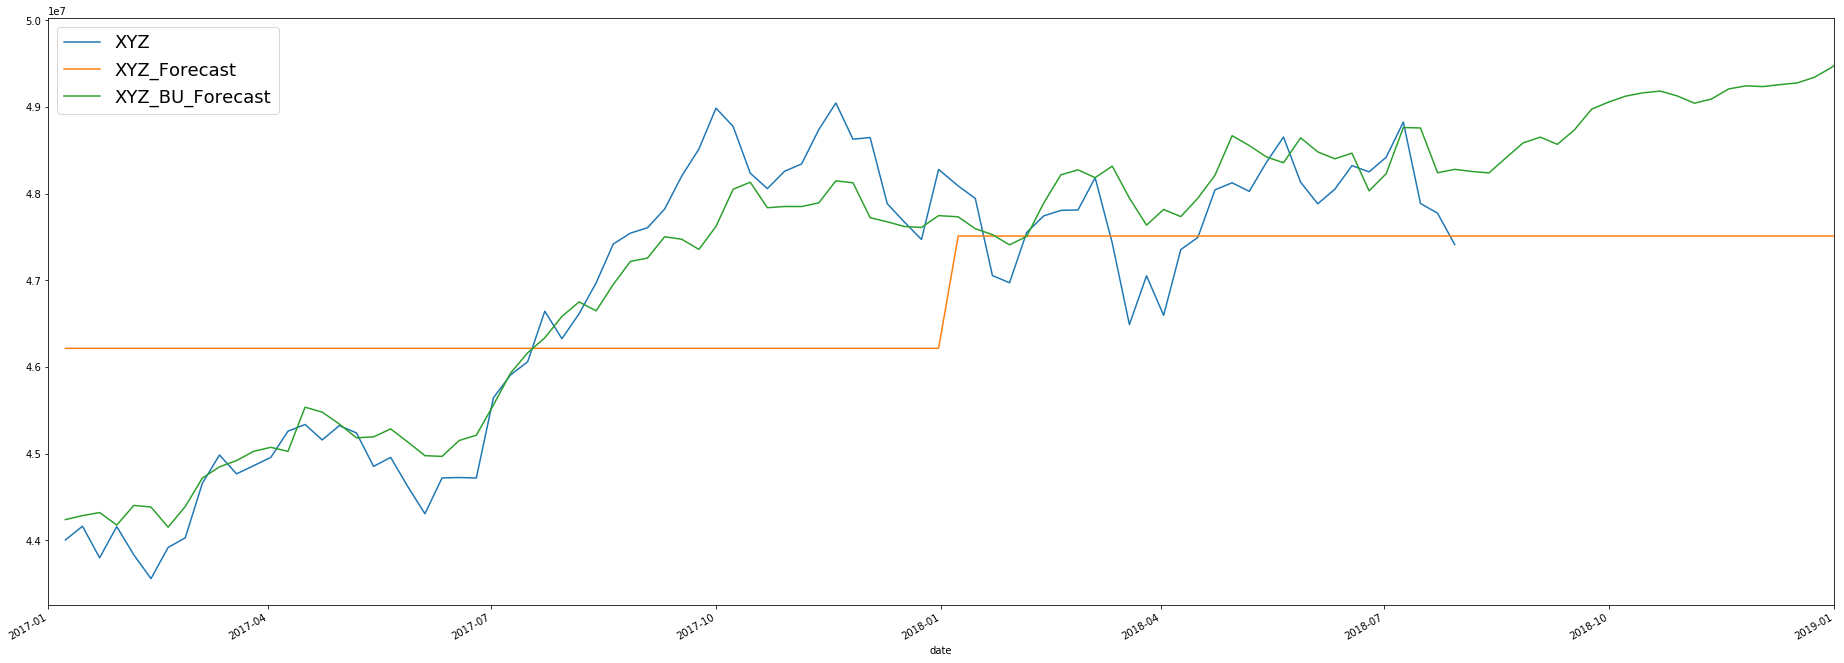

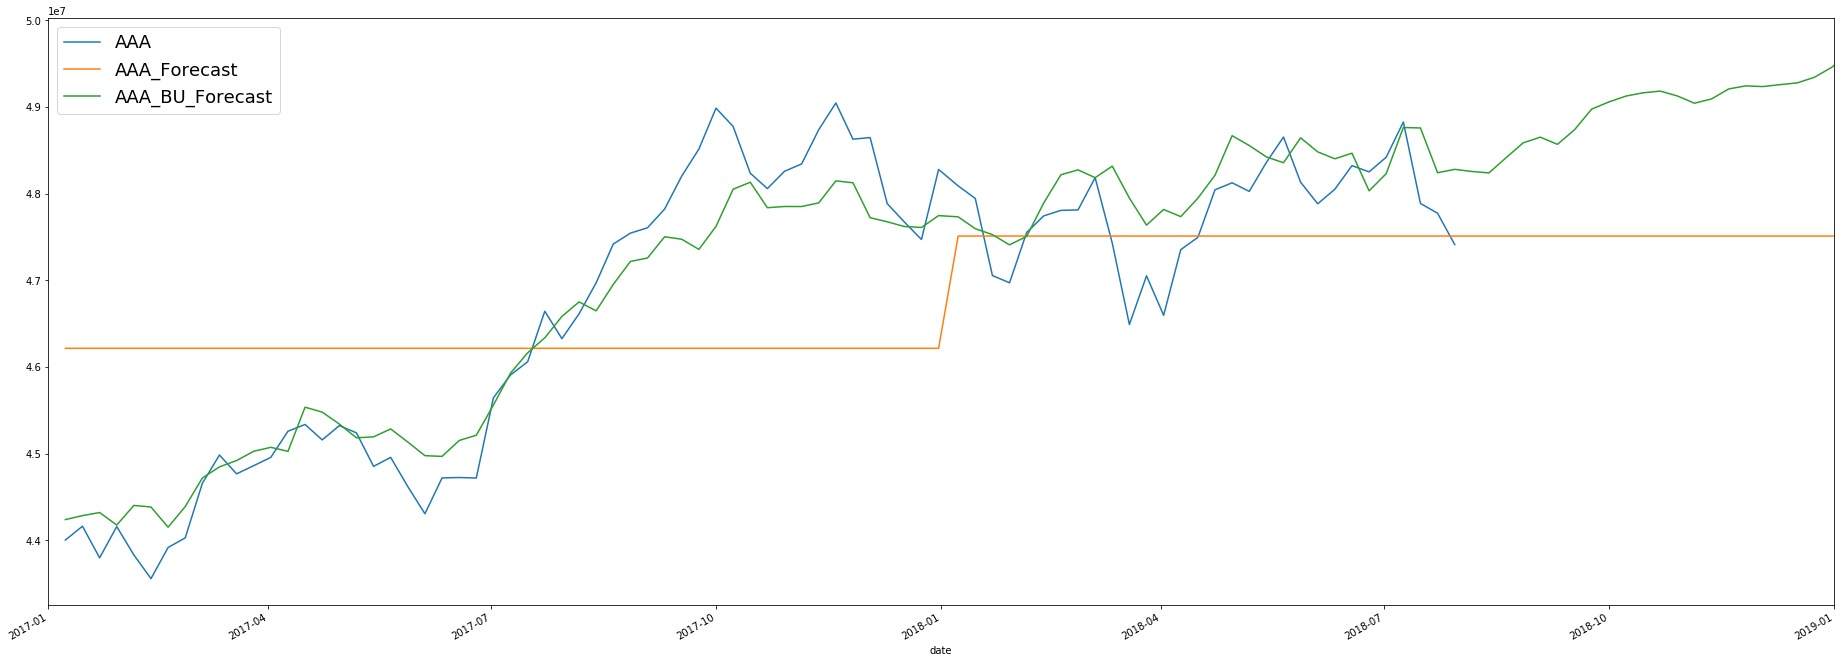

In [25]:
for cpg in ['XYZ','AAA']:
    dfapp_out.plot('date' , 
                    [cpg , cpg + '_Forecast' , 
                     cpg + '_BU_Forecast'],
                    figsize=(32 , 12),xlim=(datetime.date(2017, 1, 1), datetime.date(2019, 1, 1))).legend(fontsize=18)

## 4. Exporting

In [26]:
print(dfapp_out['XYZ_SM_N'+'_BU_Forecast'][82:105])
print(dfapp_out['date'][82:105])

82     853584.515206
83     840569.490309
84     848372.585176
85     854690.939130
86     857070.707232
87     858823.146885
88     870323.368734
89     874469.375465
90     863248.219252
91     864895.988097
92     863277.333722
93     856859.005823
94     855725.141347
95     848930.471172
96     840158.256789
97     840566.626340
98     845759.644440
99     855697.376608
100    856289.213521
101    855307.024308
102    853996.502714
103    858206.848394
104    861502.158196
Name: XYZ_SM_N_BU_Forecast, dtype: float64
82    2018-08-06
83    2018-08-13
84    2018-08-20
85    2018-08-27
86    2018-09-03
87    2018-09-10
88    2018-09-17
89    2018-09-24
90    2018-10-01
91    2018-10-08
92    2018-10-15
93    2018-10-22
94    2018-10-29
95    2018-11-05
96    2018-11-12
97    2018-11-19
98    2018-11-26
99    2018-12-03
100   2018-12-10
101   2018-12-17
102   2018-12-24
103   2018-12-31
104   2019-01-07
Name: date, dtype: datetime64[ns]


### 4.1. Create dataframe similar to input dataframe

In [27]:
df_export=pd.DataFrame(data=[],columns=['CPG','CPG Region','Channel','Retailer','Retailer Region','Year','Week','Category','Sales'])
columns_export=['CPG','CPG Region','Channel','Retailer','Retailer Region','Year','Week','Category','Sales']
print(df_export)

Empty DataFrame
Columns: [CPG, CPG Region, Channel, Retailer, Retailer Region, Year, Week, Category, Sales]
Index: []


#### 4.1.1. Find out total number of elements required

In [28]:
21*25

525

### 4.2. Attain Year and Week from date column

In [29]:
forecast_date_ts=dfapp_out['date'][81]
forecast_date=str(forecast_date_ts)
year=int(forecast_date[:4])
month=int(forecast_date[5:7])
day=int(forecast_date[8:10])
week=datetime.date(year, month, day).isocalendar()[1]
#print(year,month,day)
#print(week)
#print(dfapp_out['XYZ_SM_N_BU_Forecast'][81])

In [30]:
x=['XYZ_SM_N','XYZ_SM_E','XYZ_SM_GC','XYZ_SM_DS','XYZ_SM_W','AAA_SM_E','AAA_SM_GC','AAA_SM_DS','AAA_SM_W','XYZ_BC_N','XYZ_BC_E','XYZ_BC_S','XYZ_BC_W','AAA_BC_N','AAA_BC_E','AAA_BC_S','AAA_BC_W','XYZ_RX_N','XYZ_RX_E','XYZ_RX_S','XYZ_RX_W','AAA_RX_N','AAA_RX_E','AAA_RX_S','AAA_RX_W']
x=[y + '_BU_Forecast' for y in x] #Adding BU_Forecast to every element
forecast_elements=x

### 4.3. Function to convert Sales into Indian format

In [31]:
def currency_in_indian_format(n):
    """ Convert a number (int / float) into indian formatting style """
    d = decimal.Decimal(str(n))

    if d.as_tuple().exponent < -2:
        s = str(n)
    else:
        s = '{0:.2f}'.format(n)

    l = len(s)
    i = l - 1

    res, flag, k = '', 0, 0
    while i >= 0:
        if flag == 0:
            res += s[i]
            if s[i] == '.':
                flag = 1
        elif flag == 1:
            k += 1
            res += s[i]
            if k == 3 and i - 1 >= 0:
                res += ','
                flag = 2
                k = 0
        else:
            k += 1
            res += s[i]
            if k == 2 and i - 1 >= 0:
                res += ','
                flag = 2
                k = 0
        i -= 1

    return res[::-1]

### 4.4. Passing data into dataframe

In [32]:
df_export_list=[]
for forecast_index in range(81,103):
    Category='Widgets'
    
    forecast_date_ts=dfapp_out['date'][forecast_index]
    forecast_date=str(forecast_date_ts)
    year=int(forecast_date[:4])
    month=int(forecast_date[5:7])
    day=int(forecast_date[8:10])
    week=datetime.date(year, month, day).isocalendar()[1]
    Year=year
    Week=week
    
    for types in forecast_elements:
        typestr=str(types)
        
        if 'XYZ_' in typestr:
            CPG='XYZ Manufacturing'
        elif 'AAA_' in typestr:
            CPG='AAA Industries'
        
        if '_SM_' in typestr:
            Retailer='SuperMart'
            Channel='Mass'
        elif '_BC_' in typestr:
            Retailer='BigCo'
            Channel='Mass'
        elif '_RX_' in typestr:
            Retailer='Rx'
            Channel='Drug'
            
        if '_N' in typestr:
            Retailer_Region='North'
            CPG_Region='North'
        elif '_E' in typestr:
            Retailer_Region='East'
            CPG_Region='East'
        elif '_GC' in typestr:
            Retailer_Region='Gulf Coast'
            CPG_Region='South'
        elif '_DS' in typestr:
            Retailer_Region='Deep South'
            CPG_Region='South'
        elif '_W' in typestr:
            Retailer_Region='West'
            CPG_Region='West'
        elif '_S' in typestr:
            Retailer_Region='South'
            CPG_Region='South'
            
        Sales=dfapp_out[types][forecast_index]
        df_temp=pd.DataFrame(data=[[CPG,CPG_Region,Channel,Retailer,Retailer_Region,Year,Week,Category,Sales]],columns=columns_export)
        df_export_list.append(df_temp)
        
df_export=pd.concat(df_export_list,axis=0,ignore_index=True)
df_export.reset_index()
df_export['Sales']=df_export['Sales'].round(2)

for i in range (0,len(df_export.index)):
    a=df_export['Sales'][i]
    b=currency_in_indian_format(a)
    df_export['Sales'][i]=b
    
print(df_export.head())

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                 CPG CPG Region Channel   Retailer Retailer Region  Year  \
0  XYZ Manufacturing      North    Mass  SuperMart           North  2018   
1  XYZ Manufacturing       East    Mass  SuperMart            East  2018   
2  XYZ Manufacturing      South    Mass  SuperMart      Gulf Coast  2018   
3  XYZ Manufacturing      South    Mass  SuperMart      Deep South  2018   
4  XYZ Manufacturing       West    Mass  SuperMart            West  2018   

   Week Category         Sales  
0    31  Widgets   8,17,844.26  
1    31  Widgets  27,13,052.95  
2    31  Widgets   6,70,479.93  
3    31  Widgets   8,03,452.09  
4    31  Widgets  55,38,005.40  


### 4.5. Exporting dataframe to market_forecast.csv

In [33]:
df_export.to_csv("market_forecast.csv",index = False)